**IMPACT OF CLIMATE CHANGE ON BIRDS USING GEOSPATIAL DATA**

**IMPORTING IMPORTANT LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**LOADING AND PREPARING DATASET**

These data represent the first ten years of data collection (2007-2017) on avian abundance/density and distribution in the National Capital Region as part of the Inventory and Monitoring Program. Data were collected following the protocol outlined by Dawson and Efford (2006). Point counts were conducted at roughly 384 forest locations annually across 11 National Parks during the breeding seasons from 2007 - 2017. Each site was visited twice per year by alternate trained observers. Species detections were recorded at each location as well as whether the bird was observed within 50m or between 50 & 100m from the observer. In addition, temperature, humidity, and weather conditions were also recorded.

In 2014 the protocol was tested to see if it could be applied for monitoring grassland birds. During the 2014 field season 44 grassland monitoring plots were established at Manassas National Battlefield Park. The protocol was applied at these points and worked well. Since then monitoring was expanded to include grasslands in other parks including Antietam National Battlefield (ANTI) (89 plots), Harpers Ferry National Historical Park (HAFE) (26 plots) and Monocacy National Battlefield (MONO) (68 plots).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/NCRN LAND Bird Monitoring Data 2007 - 2017_Public.xlsx"

In [5]:
df=pd.read_excel(path)

In [6]:
df.head()


Admin_Unit_Code  Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
1            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
2            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
3            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
4            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   

        Date Start_Time  End_Time         Observer  ...  NPSTaxonCode  \
0 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         85824   
1 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         88038   
2 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         85824   
3 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         95300   
4 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         87106   

  AOU_Code PIF_Watchlist_Status Regional_Stewardship_Status  Temperature  \
0     ACFL                False                        True         15.6   
1     BGGN                False                       False         15.6   
2     ACFL                False                        True         15.6   
3     AMGO                False                       False         15.6   
4     AMCR                False                       False         15.6   

  Humidity              Sky                                   Wind  \
0     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
1     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
2     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
3     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
4     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   

          Disturbance  Initial_Three_Min_Cnt  
0  No effect on count                   True  
1  No effect on count                   True  
2  No effect on count                   True  
3  No effect on count                   True  
4  No effect on count                   True  

[5 rows x 29 columns]

In [7]:
df.tail()

Admin_Unit_Code  Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
14225            ANTI            NaN       NaN  ANTI-0054     Grassland  2017   
14226            ANTI            NaN       NaN  ANTI-0054     Grassland  2017   
14227            ANTI            NaN       NaN  ANTI-0054     Grassland  2017   
14228            ANTI            NaN       NaN  ANTI-0054     Grassland  2017   
14229            ANTI            NaN       NaN  ANTI-0054     Grassland  2017   

            Date Start_Time  End_Time      Observer  ...  NPSTaxonCode  \
14225 2017-07-07   09:51:00  10:01:00  Meta Griffin  ...         83867   
14226 2017-07-07   09:51:00  10:01:00  Meta Griffin  ...         95300   
14227 2017-07-07   09:51:00  10:01:00  Meta Griffin  ...         87391   
14228 2017-07-07   09:51:00  10:01:00  Meta Griffin  ...         87098   
14229 2017-07-07   09:51:00  10:01:00  Meta Griffin  ...         87098   

      AOU_Code PIF_Watchlist_Status Regional_Stewardship_Status  Temperature  \
14225     GRSP                False                       False         25.0   
14226     AMGO                False                       False         25.0   
14227     TRES                False                       False         25.0   
14228     UNCR                False                       False         25.0   
14229     UNCR                False                       False         25.0   

      Humidity              Sky                                        Wind  \
14225     85.0  Cloudy/Overcast  Gentle breeze (8-12 mph), leaves in motion   
14226     85.0  Cloudy/Overcast  Gentle breeze (8-12 mph), leaves in motion   
14227     85.0  Cloudy/Overcast  Gentle breeze (8-12 mph), leaves in motion   
14228     85.0  Cloudy/Overcast  Gentle breeze (8-12 mph), leaves in motion   
14229     85.0  Cloudy/Overcast  Gentle breeze (8-12 mph), leaves in motion   

                  Disturbance  Initial_Three_Min_Cnt  
14225  Slight effect on count                   True  
14226  Slight effect on count                  False  
14227  Slight effect on count                  False  
14228  Slight effect on count                  False  
14229  Slight effect on count                  False  

[5 rows x 29 columns]

In [8]:
df.shape

(14230, 29)

In [9]:

# Load the Excel file
excel_file = '/content/drive/MyDrive/NCRN LAND Bird Monitoring Data 2007 - 2017_Public.xlsx'

# Read all sheets
sheets_dict = pd.read_excel(excel_file, sheet_name=None)

# Display the names of all sheets
print("Sheets in the Excel file:")
for sheet_name in sheets_dict.keys():
    print(sheet_name)

# Perform EDA on each sheet
for sheet_name, df in sheets_dict.items():
    print(f"\n\nEDA for sheet: {sheet_name}")
    print(f"Shape of {sheet_name}:", df.shape)
    print(f"Columns in {sheet_name}:", df.columns.tolist())
    print(f"Data types in {sheet_name}:\n", df.dtypes)
    print(f"First few rows of {sheet_name}:\n", df.head())
    print(f"Summary statistics for {sheet_name}:\n", df.describe(include='all'))
    print(f"Missing values in {sheet_name}:\n", df.isnull().sum())


Sheets in the Excel file:
ANTI
CATO
CHOH
GWMP
HAFE
MANA
MONO
NACE
PRWI
ROCR
WOTR


EDA for sheet: ANTI
Shape of ANTI: (14230, 29)
Columns in ANTI: ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt']
Data types in ANTI:
 Admin_Unit_Code                        object
Sub_Unit_Code                         float64
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                            

Performed a detailed EDA for each sheet to gain insights into the data. This includes understanding the structure, summary statistics, data types, and missing values in each sheet.

In [10]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.3 MB/s eta 0:00:00


In [11]:
import pandas as pd

# Load the Excel file
excel_file = '/content/drive/MyDrive/NCRN LAND Bird Monitoring Data 2007 - 2017_Public.xlsx'

# Read all sheets into a dictionary
sheets_dict = pd.read_excel(excel_file, sheet_name=None)

# Initialize an empty list to store DataFrames
dataframes = []

# Append each DataFrame to the list
for sheet_name, df in sheets_dict.items():
    dataframes.append(df)

# Concatenate all DataFrames vertically
merged_df = pd.concat(dataframes, ignore_index=True)






Merged all the sheets in one dataframe i.e. merged_df

In [12]:
merged_df.head()

Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
1            ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
2            ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
3            ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   
4            ANTI           NaN    ANTI 2  ANTI-0207        Forest  2008   

        Date Start_Time  End_Time         Observer  ...  NPSTaxonCode  \
0 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...       85824.0   
1 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...       88038.0   
2 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...       85824.0   
3 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...       95300.0   
4 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...       87106.0   

  AOU_Code PIF_Watchlist_Status Regional_Stewardship_Status  Temperature  \
0     ACFL                False                        True         15.6   
1     BGGN                False                       False         15.6   
2     ACFL                False                        True         15.6   
3     AMGO                False                       False         15.6   
4     AMCR                False                       False         15.6   

  Humidity              Sky                                   Wind  \
0     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
1     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
2     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
3     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
4     57.0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   

          Disturbance  Initial_Three_Min_Cnt  
0  No effect on count                   True  
1  No effect on count                   True  
2  No effect on count                   True  
3  No effect on count                   True  
4  No effect on count                   True  

[5 rows x 29 columns]

In [13]:
merged_df.tail(6)

Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
126567            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126568            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126569            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126570            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126571            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   
126572            WOTR           NaN      WOTR  WOTR-0007        Forest  2014   

             Date Start_Time  End_Time       Observer  ...  NPSTaxonCode  \
126567 2014-06-06   06:57:00  07:07:00  Nick Jennings  ...       89977.0   
126568 2014-06-06   06:57:00  07:07:00  Nick Jennings  ...       84820.0   
126569 2014-06-06   06:57:00  07:07:00  Nick Jennings  ...       84865.0   
126570 2014-06-06   06:57:00  07:07:00  Nick Jennings  ...       84865.0   
126571 2014-06-06   06:57:00  07:07:00  Nick Jennings  ...       88071.0   
126572 2014-06-06   06:57:00  07:07:00  Nick Jennings  ...       85791.0   

       AOU_Code PIF_Watchlist_Status Regional_Stewardship_Status  Temperature  \
126567     GRCA                False                       False         20.6   
126568     NOFL                False                       False         20.6   
126569     RBWO                False                       False         20.6   
126570     RBWO                False                       False         20.6   
126571     SCTA                False                        True         20.6   
126572     GCFL                False                       False         20.6   

         Humidity              Sky                                   Wind  \
126567  58.200001  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
126568  58.200001  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
126569  58.200001  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
126570  58.200001  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
126571  58.200001  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
126572  58.200001  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   

               Disturbance  Initial_Three_Min_Cnt  
126567  No effect on count                   True  
126568  No effect on count                  False  
126569  No effect on count                  False  
126570  No effect on count                  False  
126571  No effect on count                   True  
126572  No effect on count                   True  

[6 rows x 29 columns]

In [14]:
merged_df.columns

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt'],
      dtype='object')

In [15]:
merged_df.describe()

Year                           Date          Visit  \
count  126573.000000                         126573  126573.000000   
mean     2012.868503  2013-04-28 18:24:25.051788288       1.588735   
min      2007.000000            2007-05-04 00:00:00       1.000000   
25%      2010.000000            2010-06-21 00:00:00       1.000000   
50%      2014.000000            2014-05-22 00:00:00       2.000000   
75%      2016.000000            2016-05-25 00:00:00       2.000000   
max      2017.000000            2017-07-19 00:00:00       4.000000   
std         3.218989                            NaN       0.618778   

         AcceptedTSN   NPSTaxonCode    Temperature       Humidity  
count  126265.000000  126570.000000  126563.000000  126474.000000  
mean   237470.991217  131000.893830      20.740950      76.213953  
min     93549.000000       0.000000       0.000000       0.000000  
25%    178532.000000   85846.000000      18.200001      71.800003  
50%    179112.000000   88296.000000      21.100000      80.000000  
75%    179759.000000   94215.000000      23.550000      86.300003  
max    950106.000000  926917.000000      43.500000      99.000000  
std    169538.841957  146476.989218       4.599117      17.100636

In [16]:
[features for features in merged_df.columns if merged_df[features].isnull().sum()>0]

['Sub_Unit_Code',
 'Site_Name',
 'Location_Type',
 'Start_Time',
 'End_Time',
 'Interval_Length',
 'ID_Method',
 'Distance',
 'Sex',
 'Common_Name',
 'Scientific_Name',
 'AcceptedTSN',
 'NPSTaxonCode',
 'AOU_Code',
 'Temperature',
 'Humidity',
 'Sky',
 'Wind',
 'Disturbance']

<Axes: >

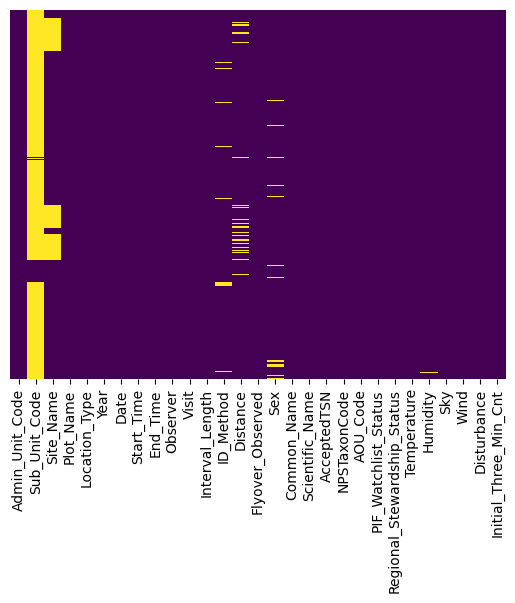

In [17]:
sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False  ,cmap='viridis')

Heatmap Interpretation:
* Yellow Areas: Indicate missing values in the dataset.
* Purple Areas: Indicate present (non-missing) values.
* Columns with Significant Missing Data: Columns with large yellow areas have
  significant missing values.
* Overall Data Completeness: Provides a quick visual assessment of which  
  columns have missing data and their extent.







In [18]:
merged_df.dtypes

Admin_Unit_Code                        object
Sub_Unit_Code                          object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                          float64
AOU_Code                               object
PIF_Watchlist_Status              

In [19]:
merged_df.shape

(126573, 29)

DATA PREPROCESSING

In [20]:
merged_df.drop(['Sub_Unit_Code'],axis=1,inplace=True)

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126573 entries, 0 to 126572
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Admin_Unit_Code              126573 non-null  object        
 1   Site_Name                    98187 non-null   object        
 2   Plot_Name                    126573 non-null  object        
 3   Location_Type                126557 non-null  object        
 4   Year                         126573 non-null  int64         
 5   Date                         126573 non-null  datetime64[ns]
 6   Start_Time                   126560 non-null  object        
 7   End_Time                     126560 non-null  object        
 8   Observer                     126573 non-null  object        
 9   Visit                        126573 non-null  int64         
 10  Interval_Length              126570 non-null  object        
 11  ID_Method                 

In [22]:
merged_df.isnull().sum()

Admin_Unit_Code                    0
Site_Name                      28386
Plot_Name                          0
Location_Type                     16
Year                               0
Date                               0
Start_Time                        13
End_Time                          13
Observer                           0
Visit                              0
Interval_Length                    3
ID_Method                       4079
Distance                        7324
Flyover_Observed                   0
Sex                             5313
Common_Name                        3
Scientific_Name                    3
AcceptedTSN                      308
NPSTaxonCode                       3
AOU_Code                           3
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                       10
Humidity                          99
Sky                               10
Wind                              10
Disturbance                       10
I

In [23]:
merged_df.drop(['Site_Name'],axis=1,inplace=True)

In [24]:
merged_df['Location_Type'].unique()

array(['Forest', 'Grassland', nan], dtype=object)

In [25]:
##lets display the nan values in Location_Type column
merged_df[merged_df['Location_Type'].isnull()]

Admin_Unit_Code  Plot_Name Location_Type  Year       Date Start_Time  \
32898            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32899            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32900            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32901            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32902            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32903            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32904            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32905            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32906            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32907            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32908            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32909            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32910            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32911            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32912            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   
32913            CHOH  CHOH-0458           NaN  2016 2016-06-09   07:02:00   

       End_Time       Observer  Visit Interval_Length  ... NPSTaxonCode  \
32898  07:12:00  Conor Higgins      1       0-2.5 min  ...      85846.0   
32899  07:12:00  Conor Higgins      1       0-2.5 min  ...      85791.0   
32900  07:12:00  Conor Higgins      1    7.5 - 10 min  ...      87106.0   
32901  07:12:00  Conor Higgins      1    7.5 - 10 min  ...      85824.0   
32902  07:12:00  Conor Higgins      1     5 - 7.5 min  ...      95300.0   
32903  07:12:00  Conor Higgins      1    7.5 - 10 min  ...      93655.0   
32904  07:12:00  Conor Higgins      1       0-2.5 min  ...      88038.0   
32905  07:12:00  Conor Higgins      1       0-2.5 min  ...      85824.0   
32906  07:12:00  Conor Higgins      1     5 - 7.5 min  ...      88350.0   
32907  07:12:00  Conor Higgins      1     5 - 7.5 min  ...      94206.0   
32908  07:12:00  Conor Higgins      1       0-2.5 min  ...      84865.0   
32909  07:12:00  Conor Higgins      1       0-2.5 min  ...      93587.0   
32910  07:12:00  Conor Higgins      1     5 - 7.5 min  ...     816311.0   
32911  07:12:00  Conor Higgins      1     2.5 - 5 min  ...      90935.0   
32912  07:12:00  Conor Higgins      1       0-2.5 min  ...      87184.0   
32913  07:12:00  Conor Higgins      1       0-2.5 min  ...     263793.0   

      AOU_Code  PIF_Watchlist_Status Regional_Stewardship_Status Temperature  \
32898     EAWP                 False                        True        13.7   
32899     GCFL                 False                       False        13.7   
32900     AMCR                 False                       False        13.7   
32901     ACFL                 False                        True        13.7   
32902     AMGO                 False                       False        13.7   
32903     BAOR                 False                       False        13.7   
32904     BGGN                 False                       False        13.7   
32905     ACFL                 False                        True        13.7   
32906     CARW                 False                       False        13.7   
32907     COGR                 False                       False        13.7   
32908     RBWO                 False                       False        13.7   
32909     REVI                 False                       False        13.7   
32910     UNWO                 False                       False        13.7   
32911     WBNU                 False                       False        13.7   
32912     EABL                 False                       False        13.7   
32913     UNCH                 False                       False        13.7   

      Humidity                  Sky       

In [26]:
##lets drop those nan values
merged_df.drop(merged_df.iloc[32898:32914].index, inplace=True)

In [27]:
###lets check for any null value in that column
merged_df['Location_Type'].isnull().sum()

0

In [28]:
index_locationtype=merged_df['Location_Type'].value_counts().index
index_locationtype

Index(['Forest', 'Grassland'], dtype='object', name='Location_Type')

In [29]:
values_locationtype=merged_df['Location_Type'].value_counts().values
values_locationtype

array([98171, 28386])

([<matplotlib.patches.Wedge at 0x7850256d4e50>,
 [Text(-0.8380285858425356, 0.7125363775350423, 'Forest'),
  Text(0.8380285858425358, -0.712536377535042, 'Grassland')],
 [Text(-0.4571065013686557, 0.3886562059282048, '77.571%'),
  Text(0.4571065013686558, -0.38865620592820466, '22.429%')])

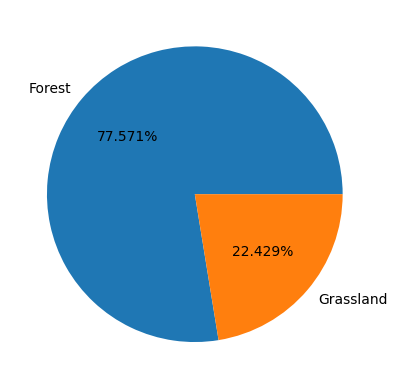

In [30]:
plt.pie(values_locationtype,labels=index_locationtype,autopct='%1.3f%%')

Pie Chart Interpretation:

1.Forest: Represents 77.571% of the total habitat.

2.Grassland: Represents 22.429% of the total habitat.

This pie chart provides a clear visual representation of the habitat distribution, showing that the majority of the data points come from Forest habitats, with a smaller proportion from Grassland habitats.

In [31]:
admin_index=merged_df['Admin_Unit_Code'].value_counts().index
admin_index

Index(['PRWI', 'CHOH', 'ANTI', 'MANA', 'MONO', 'CATO', 'NACE', 'HAFE', 'GWMP',
       'ROCR', 'WOTR'],
      dtype='object', name='Admin_Unit_Code')

In [32]:
admin_values=merged_df['Admin_Unit_Code'].value_counts().values
admin_values

array([29111, 26401, 14230, 14223, 10708,  9741,  7623,  5579,  4696,
        3588,   657])

([<matplotlib.patches.Wedge at 0x78502625b130>,
 [Text(0.8250699941050661, 0.7275022369913831, 'PRWI'),
  Text(-0.5559405439238984, 0.9491733833297267, 'CHOH'),
  Text(-1.0994246389748172, 0.03557334978735102, 'ANTI'),
  Text(-0.859492679973925, -0.6864927771442613, 'MANA'),
  Text(-0.3018356390185567, -1.0577784489288198, 'MONO'),
  Text(0.2504057430381171, -1.0711194909315807, 'CATO'),
  Text(0.6750287863289353, -0.8685252659694391, 'NACE'),
  Text(0.9186685329265053, -0.6050191125994803, 'HAFE'),
  Text(1.0415969936478309, -0.35366043434882694, 'GWMP'),
  Text(1.0918660650776058, -0.13352339095434002, 'ROCR'),
  Text(1.099853711306589, -0.01793916734752533, 'WOTR')],
 [Text(0.4500381786027633, 0.3968194019952998, '23.0%'),
  Text(-0.30324029668576274, 0.517730936361669, '20.9%'),
  Text(-0.5996861667135366, 0.0194036453385551, '11.2%'),
  Text(-0.4688141890766863, -0.37445060571505157, '11.2%'),
  Text(-0.1646376212828491, -0.5769700630520834, '8.5%'),
  Text(0.13658495074806384, -0

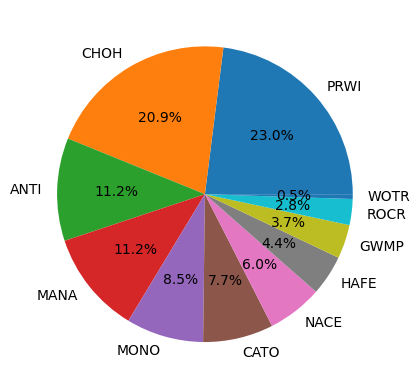

In [33]:
plt.pie(admin_values,labels=admin_index,autopct='%1.1f%%')

The pie chart shows the percentage distribution of admin_unit_code column represented by abbreviations. The largest segments are PRWI (23.0%) and CHOH (20.9%), followed by smaller segments like ANTI, MANA, MONO, and others.

In [34]:
plot_index=merged_df['Plot_Name'].unique()
admin_index

Index(['PRWI', 'CHOH', 'ANTI', 'MANA', 'MONO', 'CATO', 'NACE', 'HAFE', 'GWMP',
       'ROCR', 'WOTR'],
      dtype='object', name='Admin_Unit_Code')

In [35]:

# Creating a dictionary to map Admin Unit Codes to their full names
park_names = {
    'PRWI': 'Prince William Forest Park',
    'CHOH': 'Chesapeake and Ohio Canal National Historical Park',
    'ANTI': 'Antietam National Battlefield',
    'MANA': 'Manassas National Battlefield Park',
    'MONO': 'Monocacy National Battlefield',
    'CATO': 'Catoctin Mountain Park',
    'NACE': 'National Capital Parks-East',
    'HAFE': 'Harpers Ferry National Historical Park',
    'GWMP': 'George Washington Memorial Parkway',
    'ROCR': 'Rock Creek Park',
    'WOTR': 'Wolf Trap National Park for the Performing Arts'
}

# Adding a new column 'Park_Name' to the dataframe
merged_df['Park_Name'] = merged_df['Admin_Unit_Code'].map(park_names)




This code will create a new column Park_Name in the dataframe merged_df based on the Admin_Unit_Code.

In [36]:
plot_values=merged_df['Plot_Name'].value_counts().values
plot_values

array([382, 362, 361, 353, 352, 348, 347, 343, 342, 342, 341, 339, 339,
       338, 335, 335, 332, 332, 331, 330, 328, 327, 326, 326, 324, 323,
       323, 320, 317, 316, 314, 314, 313, 313, 311, 311, 310, 310, 310,
       310, 309, 309, 307, 306, 306, 305, 305, 305, 305, 305, 304, 304,
       304, 303, 303, 303, 302, 302, 300, 300, 298, 298, 298, 298, 296,
       296, 296, 295, 295, 295, 295, 294, 293, 293, 293, 293, 292, 292,
       290, 290, 290, 290, 290, 289, 289, 289, 288, 287, 287, 287, 286,
       286, 286, 285, 285, 283, 283, 283, 282, 282, 281, 280, 279, 279,
       278, 278, 275, 275, 275, 274, 274, 274, 274, 273, 273, 273, 272,
       272, 272, 272, 271, 271, 271, 271, 270, 270, 270, 269, 269, 269,
       268, 268, 268, 267, 266, 266, 266, 265, 264, 263, 263, 262, 262,
       262, 261, 260, 260, 260, 259, 259, 258, 258, 258, 258, 258, 257,
       257, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 253, 253,
       253, 253, 253, 252, 252, 252, 252, 252, 251, 251, 251, 25

In [37]:

plot_data = pd.DataFrame({'Category': plot_index, 'Value': plot_values})



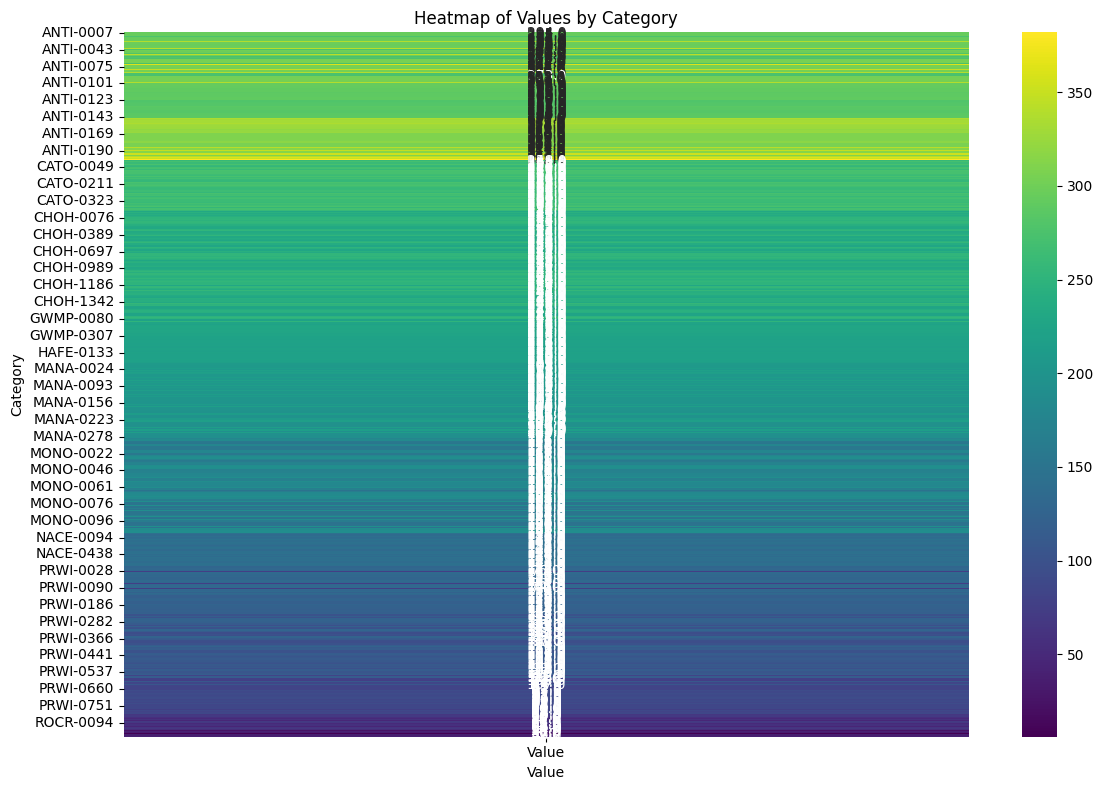

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for heatmap
heatmap_data = plot_data.pivot_table(values='Value', index='Category', aggfunc='sum').fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.1f')
plt.xlabel('Value')
plt.ylabel('Category')
plt.title('Heatmap of Values by Category')
plt.tight_layout()
plt.show()


The color gradient ranges from dark blue (lower values) to bright yellow (higher values). The majority of the categories fall within the green to blue spectrum, indicating mid to lower values, with only a few reaching the higher value range in yellow. The codes correspond to different parks and their specific subcategories, showing a comparative intensity of values across the dataset.

<ipython-input-39-3cb00a1fdf26>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Category', data=top_aggregated_plot_data, palette='viridis')


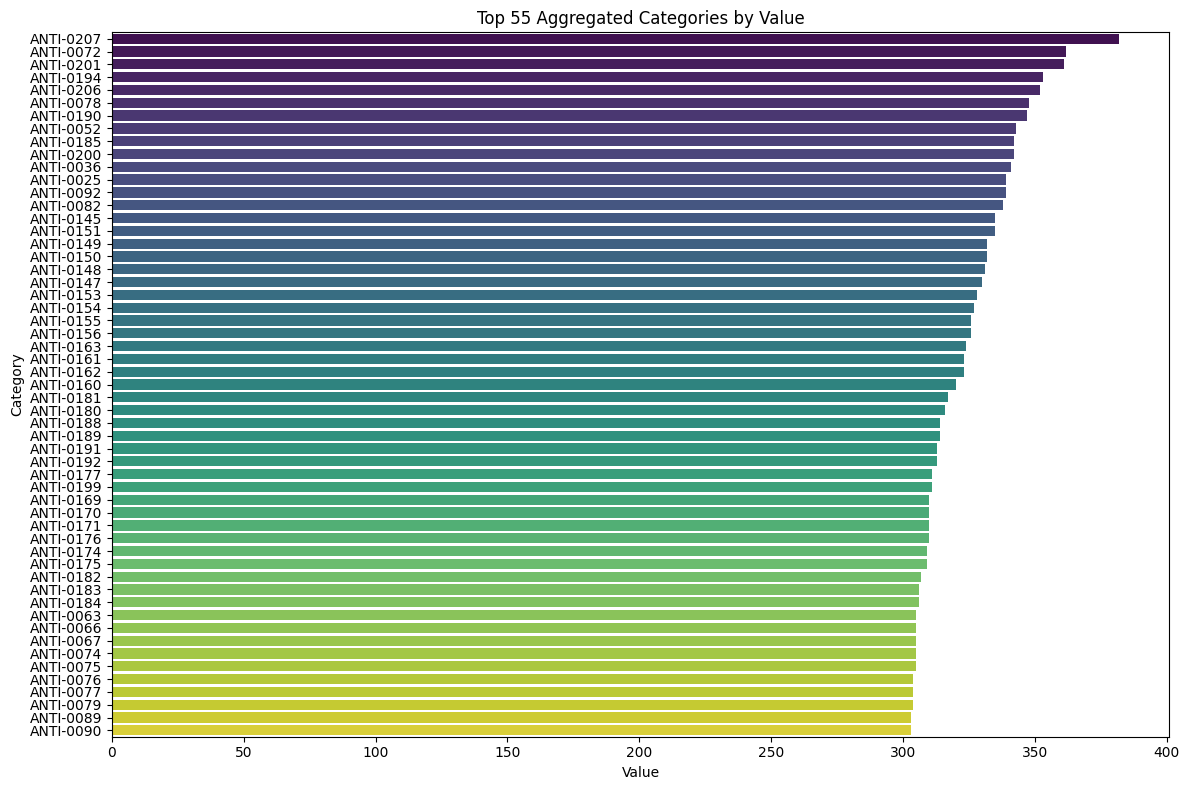

In [39]:
##top N categories
import seaborn as sns
import matplotlib.pyplot as plt

# Example of aggregation (assuming plot_data can be aggregated by 'Category')
aggregated_plot_data = plot_data.groupby('Category').sum().reset_index()


N = 55  #number of categories to display
top_aggregated_plot_data = aggregated_plot_data.nlargest(N, 'Value')


plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Category', data=top_aggregated_plot_data, palette='viridis')
plt.xlabel('Value')
plt.ylabel('Category')
plt.title(f'Top {N} Aggregated Categories by Value')
plt.tight_layout()
plt.show()


In [40]:
merged_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                       13
End_Time                         13
Observer                          0
Visit                             0
Interval_Length                   3
ID_Method                      4079
Distance                       7323
Flyover_Observed                  0
Sex                            5313
Common_Name                       3
Scientific_Name                   3
AcceptedTSN                     308
NPSTaxonCode                      3
AOU_Code                          3
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                      10
Humidity                         99
Sky                              10
Wind                             10
Disturbance                      10
Initial_Three_Min_Cnt             0
Park_Name                   

In [41]:
# Filter rows where Start_Time or End_Time is null
merged_df[merged_df['Start_Time'].isnull() | merged_df['End_Time'].isnull()]




Admin_Unit_Code  Plot_Name Location_Type  Year       Date Start_Time  \
125903            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125904            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125905            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125906            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125907            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125908            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125909            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125910            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125911            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125912            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125913            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125914            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   
125915            ROCR  ROCR-0145        Forest  2012 2012-05-22        NaN   

       End_Time       Observer  Visit Interval_Length  ... AOU_Code  \
125903      NaN  A.J. MacLaren      1    7.5 - 10 min  ...     SOSP   
125904      NaN  A.J. MacLaren      1    7.5 - 10 min  ...     NOFL   
125905      NaN  A.J. MacLaren      1       0-2.5 min  ...     RBWO   
125906      NaN  A.J. MacLaren      1     2.5 - 5 min  ...     RBWO   
125907      NaN  A.J. MacLaren      1     5 - 7.5 min  ...     NOCA   
125908      NaN  A.J. MacLaren      1       0-2.5 min  ...     ETTI   
125909      NaN  A.J. MacLaren      1     5 - 7.5 min  ...     EATO   
125910      NaN  A.J. MacLaren      1    7.5 - 10 min  ...     CHSW   
125911      NaN  A.J. MacLaren      1       0-2.5 min  ...     CACH   
125912      NaN  A.J. MacLaren      1    7.5 - 10 min  ...     BLPW   
125913      NaN  A.J. MacLaren      1       0-2.5 min  ...     BLJA   
125914      NaN  A.J. MacLaren      1     2.5 - 5 min  ...     AMRO   
125915      NaN  A.J. MacLaren      1     5 - 7.5 min  ...     RBWO   

       PIF_Watchlist_Status  Regional_Stewardship_Status Temperature Humidity  \
125903                False                        False        23.0     0.79   
125904                False                        False        23.0     0.79   
125905                False                        False        23.0     0.79   
125906                False                        False        23.0     0.79   
125907                False                        False        23.0     0.79   
125908                False                        False        23.0     0.79   
125909                False                         True        23.0     0.79   
125910                False                         True        23.0     0.79   
125911                False                         True        23.0     0.79   
125912                False                        False        23.0     0.79   
125913                False                        False        23.0     0.79   
125914                False                        False        23.0     0.79   
125915                False                        False        23.0     0.79   

                 Sky                                   Wind  \
125903  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125904  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125905  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125906  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125907  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125908  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125909  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125910  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125911  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125912  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125913  Rain Showers  Calm (< 1 mph) smoke rises vertically   
125914  Rain S

In [42]:
merged_df.drop(merged_df.iloc[125903:125916].index, inplace=True)

In [43]:
merged_df['Start_Time'].isnull().sum()

13

In [44]:
merged_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                       13
End_Time                         13
Observer                          0
Visit                             0
Interval_Length                   3
ID_Method                      4079
Distance                       7320
Flyover_Observed                  0
Sex                            5313
Common_Name                       3
Scientific_Name                   3
AcceptedTSN                     308
NPSTaxonCode                      3
AOU_Code                          3
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                      10
Humidity                         99
Sky                              10
Wind                             10
Disturbance                      10
Initial_Three_Min_Cnt             0
Park_Name                   

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126544 entries, 0 to 126572
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Admin_Unit_Code              126544 non-null  object        
 1   Plot_Name                    126544 non-null  object        
 2   Location_Type                126544 non-null  object        
 3   Year                         126544 non-null  int64         
 4   Date                         126544 non-null  datetime64[ns]
 5   Start_Time                   126531 non-null  object        
 6   End_Time                     126531 non-null  object        
 7   Observer                     126544 non-null  object        
 8   Visit                        126544 non-null  int64         
 9   Interval_Length              126541 non-null  object        
 10  ID_Method                    122465 non-null  object        
 11  Distance                     11

In [46]:
# Display the initial count of NaN values in the Start_Time column
initial_nan_count = merged_df['Start_Time'].isnull().sum()
print(f"Initial number of NaN values in Start_Time column: {initial_nan_count}")

# Drop rows where Start_Time column is NaN
merged_df.dropna(subset=['Start_Time'], inplace=True)

# Verify that there are no NaN values in the Start_Time column
final_nan_count = merged_df['Start_Time'].isnull().sum()
print(f"Final number of NaN values in Start_Time column: {final_nan_count}")

# Display the shape of the dataframe after dropping rows
print(f"Shape of the dataframe after dropping rows: {merged_df.shape}")


Initial number of NaN values in Start_Time column: 13
Final number of NaN values in Start_Time column: 0
Shape of the dataframe after dropping rows: (126531, 28)


also end_time nan value sum is 0

In [47]:
merged_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   3
ID_Method                      4079
Distance                       7320
Flyover_Observed                  0
Sex                            5313
Common_Name                       3
Scientific_Name                   3
AcceptedTSN                     308
NPSTaxonCode                      3
AOU_Code                          3
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                      10
Humidity                         99
Sky                              10
Wind                             10
Disturbance                      10
Initial_Three_Min_Cnt             0
Park_Name                   

In [48]:
merged_df.head(2)

Admin_Unit_Code  Plot_Name Location_Type  Year       Date Start_Time  \
0            ANTI  ANTI-0207        Forest  2008 2008-05-28   06:42:00   
1            ANTI  ANTI-0207        Forest  2008 2008-05-28   06:42:00   

   End_Time         Observer  Visit Interval_Length  ... AOU_Code  \
0  06:52:00  Desiree Narango      1       0-2.5 min  ...     ACFL   
1  06:52:00  Desiree Narango      1       0-2.5 min  ...     BGGN   

  PIF_Watchlist_Status  Regional_Stewardship_Status Temperature Humidity  \
0                False                         True        15.6     57.0   
1                False                        False        15.6     57.0   

               Sky                                   Wind         Disturbance  \
0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically  No effect on count   
1  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically  No effect on count   

  Initial_Three_Min_Cnt                      Park_Name  
0                  True  Antietam National Battlefield  
1                  True  Antietam National Battlefield  

[2 rows x 28 columns]

In [49]:
interval_mode = merged_df['Interval_Length'].mode()[0]
merged_df['Interval_Length'].fillna(interval_mode, inplace=True)

In [50]:
merged_df['Interval_Length'].isnull().sum()

0

In [51]:
merged_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                      4079
Distance                       7320
Flyover_Observed                  0
Sex                            5313
Common_Name                       3
Scientific_Name                   3
AcceptedTSN                     308
NPSTaxonCode                      3
AOU_Code                          3
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                      10
Humidity                         99
Sky                              10
Wind                             10
Disturbance                      10
Initial_Three_Min_Cnt             0
Park_Name                   

In [52]:
merged_df['ID_Method'].unique()

array(['Calling', 'Singing', 'Visualization', nan], dtype=object)

In [53]:
missing_id_method = merged_df['ID_Method'].isnull().sum()
total_rows = len(merged_df)
missing_percentage = (missing_id_method / total_rows) * 100
print(f"Missing ID_Method values: {missing_id_method} ({missing_percentage:.2f}%)")


Missing ID_Method values: 4079 (3.22%)


 fill nan with mode of particular column

In [54]:
id_method_mode = merged_df['ID_Method'].mode()[0]
merged_df['ID_Method'].fillna(id_method_mode, inplace=True)


In [55]:
merged_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         0
Distance                       7320
Flyover_Observed                  0
Sex                            5313
Common_Name                       3
Scientific_Name                   3
AcceptedTSN                     308
NPSTaxonCode                      3
AOU_Code                          3
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                      10
Humidity                         99
Sky                              10
Wind                             10
Disturbance                      10
Initial_Three_Min_Cnt             0
Park_Name                   

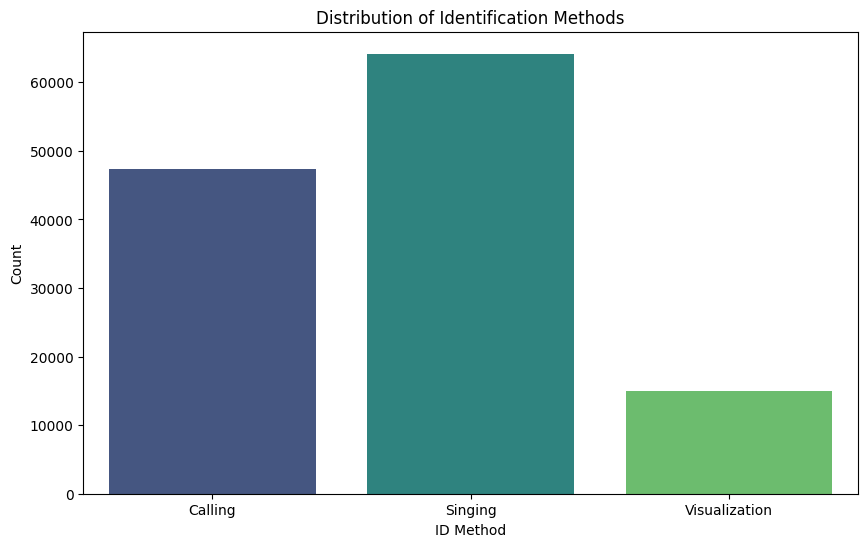

In [56]:

# Plot the distribution of the 'ID_Method' column
plt.figure(figsize=(10, 6))
sns.countplot(x='ID_Method', data=merged_df, hue='ID_Method', palette='viridis', legend=False)
plt.title('Distribution of Identification Methods')
plt.xlabel('ID Method')
plt.ylabel('Count')
plt.show()


The ID_Method column in this dataset likely represents the method used to identify the bird species during observation. Different ID methods used by observers to record birds are calling, singing and visualization.

In [57]:
merged_df['Distance'].unique()

array(['<= 50 Meters', '50 - 100 Meters', nan], dtype=object)

In [58]:
missing_distance = merged_df['Distance'].isnull().sum()
total_rows = len(merged_df)
missing_percentage = (missing_distance / total_rows) * 100
print(f"Missing ID_Method values: {missing_distance} ({missing_percentage:.2f}%)")


Missing ID_Method values: 7320 (5.79%)


In [59]:
distance_mode = merged_df['Distance'].mode()[0]
merged_df['Distance'].fillna(distance_mode, inplace=True)


<ipython-input-60-e7c31f94f89f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Distance', data=merged_df, palette='viridis')


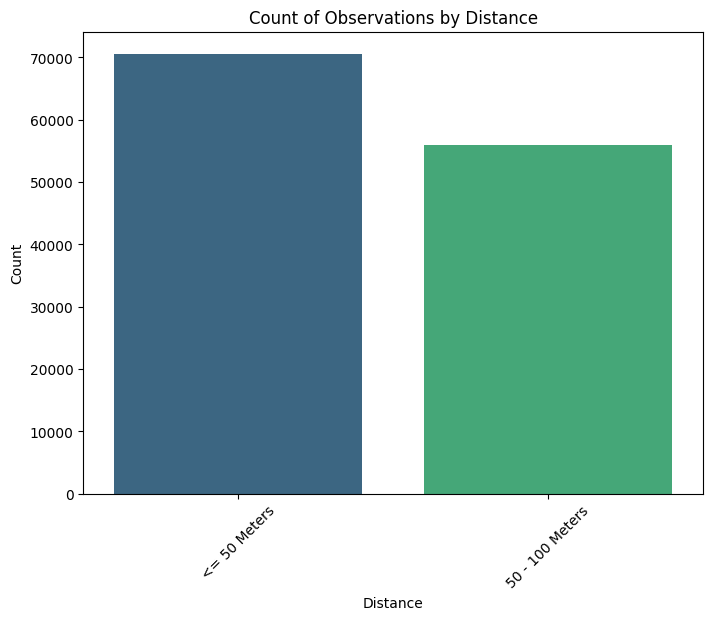

In [60]:


# Plotting a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Distance', data=merged_df, palette='viridis')
plt.title('Count of Observations by Distance')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Maximum birds where observed within range of <= 50 metres.

In [61]:
merged_df.isnull().sum()

Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         0
Distance                          0
Flyover_Observed                  0
Sex                            5313
Common_Name                       3
Scientific_Name                   3
AcceptedTSN                     308
NPSTaxonCode                      3
AOU_Code                          3
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                      10
Humidity                         99
Sky                              10
Wind                             10
Disturbance                      10
Initial_Three_Min_Cnt             0
Park_Name                   

In [62]:
merged_df.Sex.unique()

array(['Undetermined', 'Male', nan, 'Female'], dtype=object)

In [63]:
###lets fill the nan value in sex column with undetermined
merged_df['Sex'].fillna('Undetermined',inplace=True)
merged_df.Sex.unique()


array(['Undetermined', 'Male', 'Female'], dtype=object)

In [64]:
###lets map male with 1,female with 0 and undetermined with 2
merged_df['Sex']=merged_df['Sex'].map({'Male':1,'Female':0,'Undetermined':2})

<ipython-input-65-a27db6c556bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=merged_df, palette='viridis')


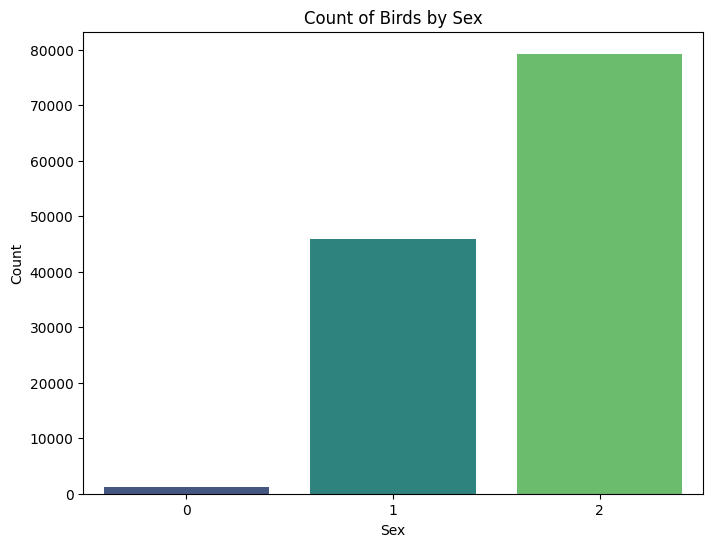

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=merged_df, palette='viridis')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Birds by Sex')
plt.show()

The count for undetermined category for sex is maximum, followed by male and least count is of female.

In [66]:
merged_df.isnull().sum()

Admin_Unit_Code                  0
Plot_Name                        0
Location_Type                    0
Year                             0
Date                             0
Start_Time                       0
End_Time                         0
Observer                         0
Visit                            0
Interval_Length                  0
ID_Method                        0
Distance                         0
Flyover_Observed                 0
Sex                              0
Common_Name                      3
Scientific_Name                  3
AcceptedTSN                    308
NPSTaxonCode                     3
AOU_Code                         3
PIF_Watchlist_Status             0
Regional_Stewardship_Status      0
Temperature                     10
Humidity                        99
Sky                             10
Wind                            10
Disturbance                     10
Initial_Three_Min_Cnt            0
Park_Name                        0
dtype: int64

In [67]:
merged_df.Common_Name.unique()

array(['Acadian Flycatcher', 'Blue-gray Gnatcatcher',
       'American Goldfinch', 'American Crow', 'Wood Thrush',
       'Eastern Wood-Pewee', 'Eastern Tufted Titmouse',
       'Hairy Woodpecker', 'Northern Cardinal', 'Northern Flicker',
       'Red-bellied Woodpecker', 'White-breasted Nuthatch',
       'Yellow-billed Cuckoo', 'Ruby-throated Hummingbird',
       'Red-eyed Vireo', 'Scarlet Tanager', 'Yellow-throated Vireo',
       'Downy Woodpecker', 'Carolina Wren', 'Mourning Dove', 'Blue Jay',
       'Carolina Chickadee', 'Red-shouldered Hawk', 'Canada Goose',
       'Cedar Waxwing', 'Eastern Towhee', 'Indigo Bunting',
       'American Robin', 'Brown-headed Cowbird', 'Purple Martin',
       'Unidentified Bird', 'Pileated Woodpecker',
       'Unidentified Woodpecker', 'Field Sparrow', 'Gray Catbird',
       'Northern Parula', 'Great Crested Flycatcher', 'American Redstart',
       'Red-headed Woodpecker', 'Unidentified Chickadee',
       'Great Blue Heron', 'Unidentified Warbler', 'Ba

In [68]:
merged_df.dropna(subset=['Common_Name'], inplace=True)

Drop rows with null value in common_name

In [69]:
name_index=merged_df.Common_Name.value_counts().index
name_index

Index(['Red-eyed Vireo', 'Northern Cardinal', 'Eastern Tufted Titmouse',
       'Eastern Wood-Pewee', 'Carolina Wren', 'Acadian Flycatcher',
       'Wood Thrush', 'Blue-gray Gnatcatcher', 'Red-bellied Woodpecker',
       'American Goldfinch',
       ...
       'Solitary Vireo', 'Snowy Egret', 'Philadelphia Vireo',
       'Mourning Warbler', 'Marsh Wren', 'American Bittern',
       'Ruby-crowned Kinglet', 'Hooded Merganser',
       'Unidentified Accipiter Hawk', 'Red-breasted Nuthatch'],
      dtype='object', name='Common_Name', length=182)

In [70]:
name_counts=merged_df.Common_Name.value_counts().values
name_counts

array([8125, 6465, 6354, 5414, 5148, 4886, 4600, 4500, 4037, 3956, 3560,
       3559, 3409, 3135, 3072, 3047, 2921, 2609, 2593, 2439, 2169, 1973,
       1884, 1804, 1779, 1652, 1612, 1549, 1469, 1463, 1336, 1168, 1125,
       1104,  982,  973,  944,  887,  808,  775,  761,  692,  646,  600,
        596,  545,  534,  524,  508,  470,  431,  413,  406,  396,  382,
        336,  323,  286,  271,  261,  259,  221,  221,  220,  209,  207,
        205,  202,  189,  185,  159,  151,  142,  135,  133,  130,  130,
        123,  119,  118,  117,  114,  113,  110,   98,   95,   91,   86,
         77,   70,   67,   65,   63,   58,   58,   56,   55,   53,   52,
         50,   49,   47,   45,   43,   37,   34,   32,   29,   28,   26,
         26,   26,   26,   25,   24,   22,   21,   19,   17,   16,   15,
         15,   13,   13,   12,   12,   10,   10,   10,    9,    7,    7,
          7,    7,    6,    6,    6,    5,    5,    5,    5,    4,    4,
          4,    4,    3,    3,    3,    3,    3,   

In [71]:
merged_df.isnull().sum()

Admin_Unit_Code                  0
Plot_Name                        0
Location_Type                    0
Year                             0
Date                             0
Start_Time                       0
End_Time                         0
Observer                         0
Visit                            0
Interval_Length                  0
ID_Method                        0
Distance                         0
Flyover_Observed                 0
Sex                              0
Common_Name                      0
Scientific_Name                  0
AcceptedTSN                    305
NPSTaxonCode                     0
AOU_Code                         0
PIF_Watchlist_Status             0
Regional_Stewardship_Status      0
Temperature                     10
Humidity                        99
Sky                             10
Wind                            10
Disturbance                     10
Initial_Three_Min_Cnt            0
Park_Name                        0
dtype: int64

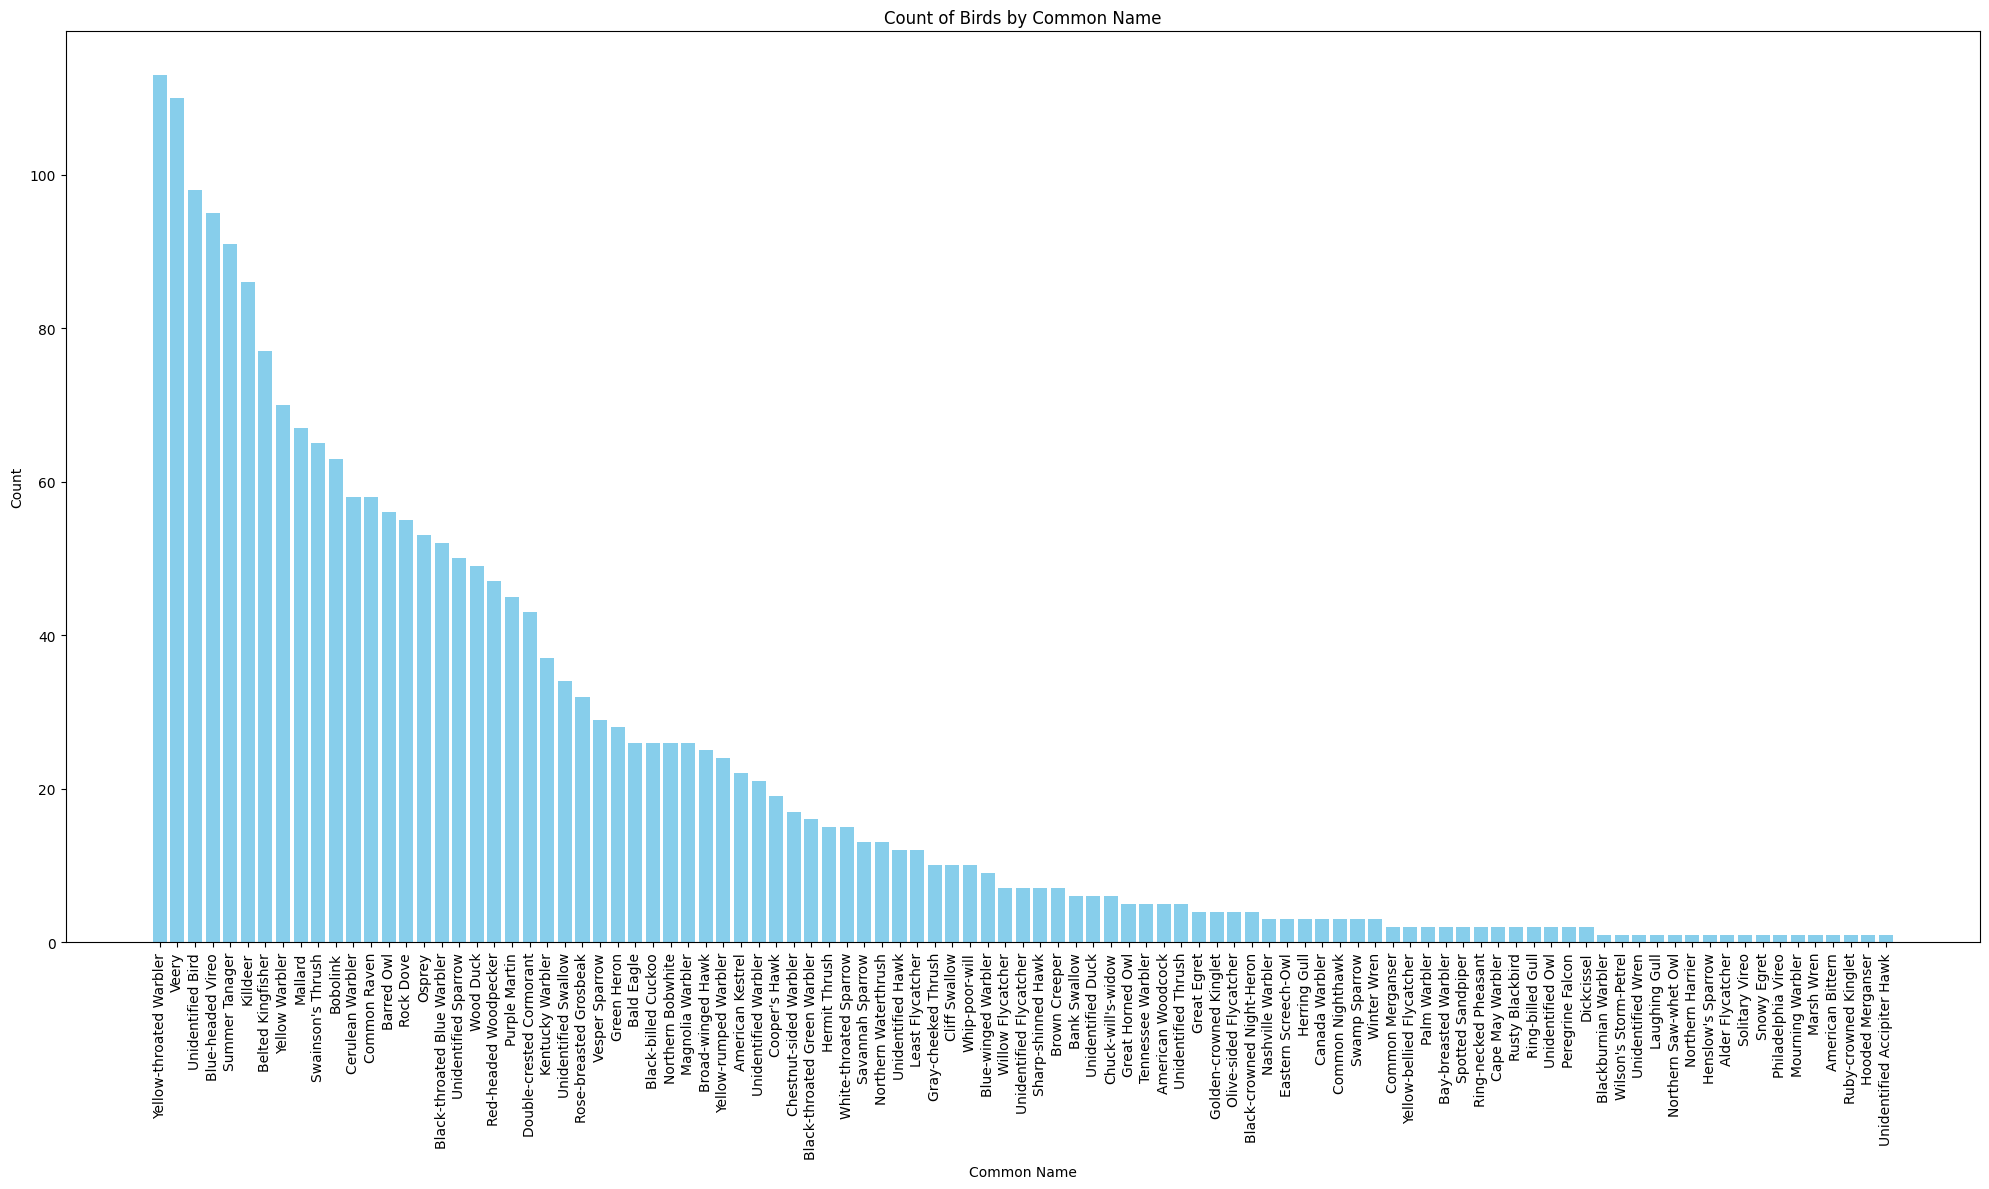

In [72]:
plt.figure(figsize=(20, 12))
plt.bar(name_index[-100:-1], name_counts[-100:-1], color='skyblue')
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.title('Count of Birds by Common Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

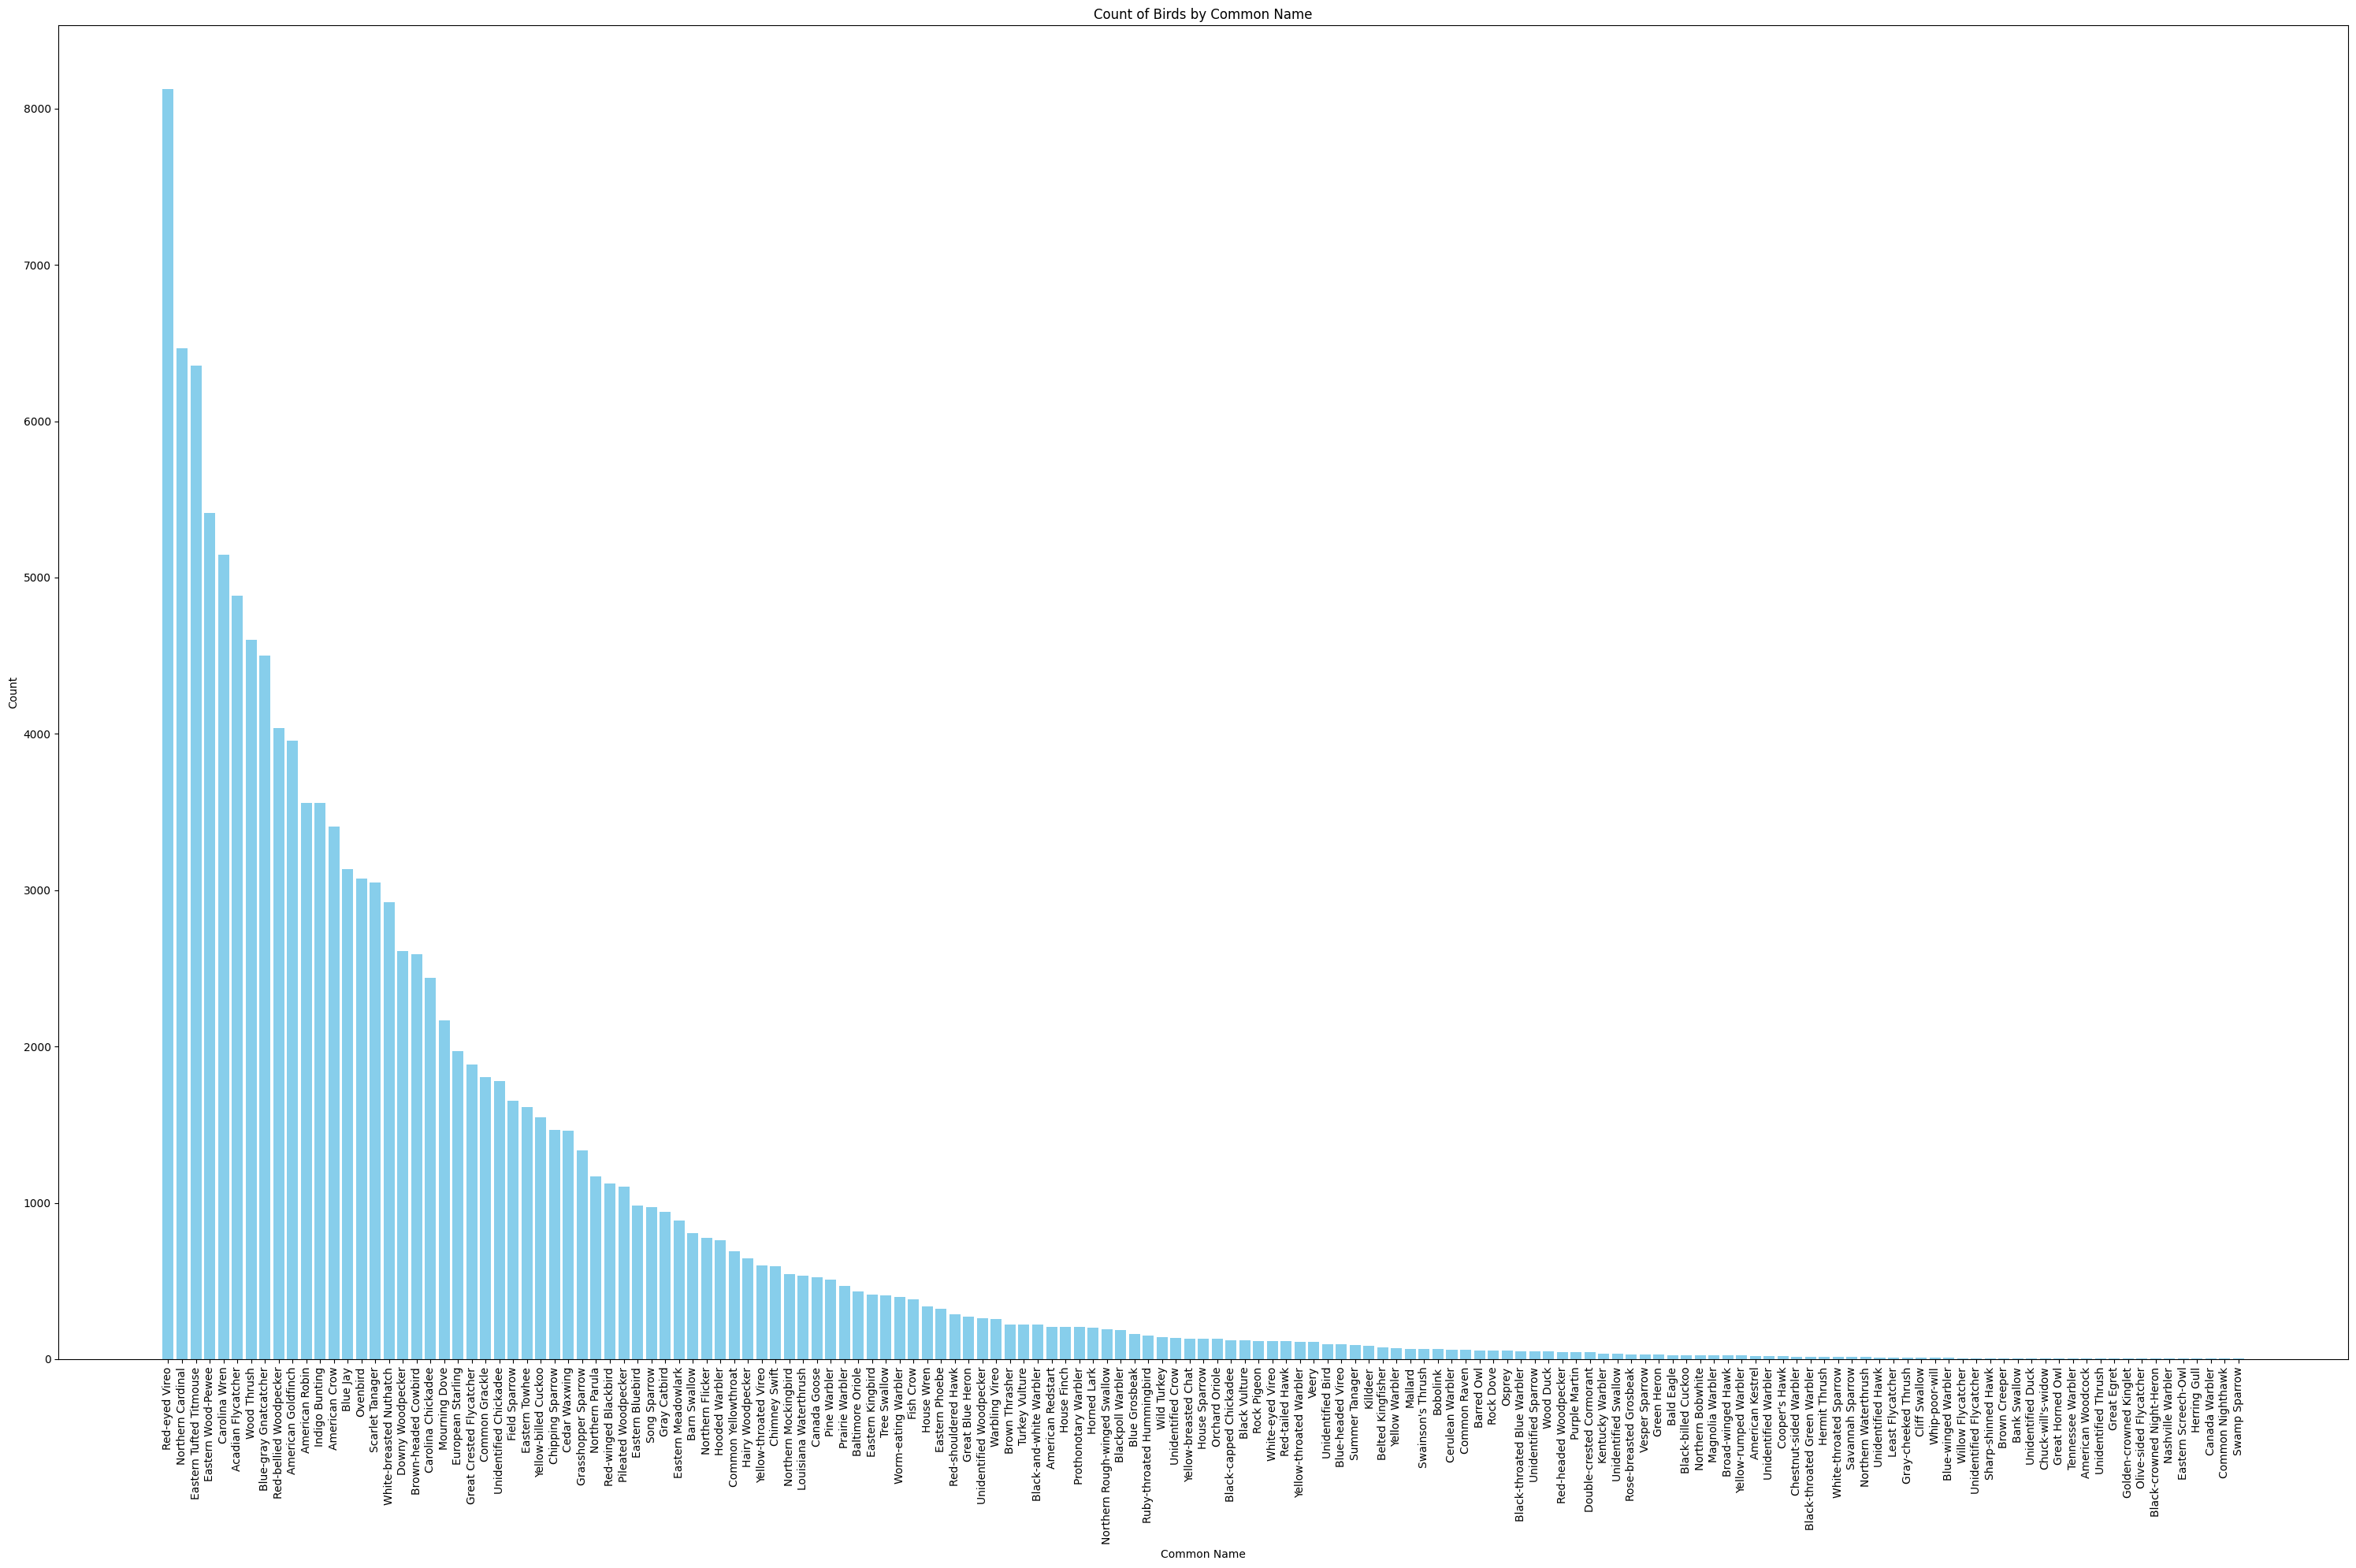

In [73]:
plt.figure(figsize=(30, 20))
plt.bar(name_index[0:151], name_counts[0:151], color='skyblue')
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.title('Count of Birds by Common Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

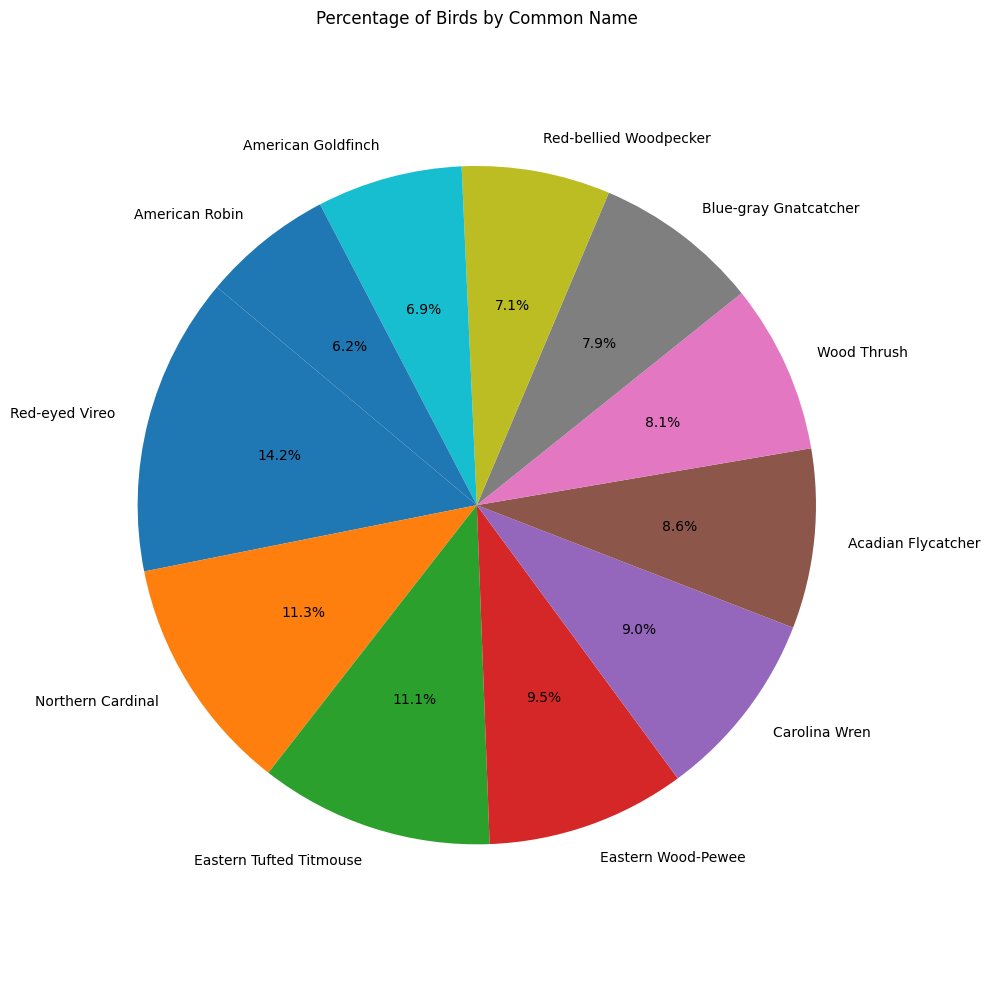

In [74]:
import matplotlib.pyplot as plt

# Example data
name_counts = merged_df['Common_Name'].value_counts().values
name_index = merged_df['Common_Name'].value_counts().index

plt.figure(figsize=(10, 10))
plt.pie(name_counts[:11], labels=name_index[:11], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Birds by Common Name')
plt.tight_layout()
plt.show()


The pie chart shows the percentage distribution of top 11(by %) birds by their common names. The largest segment is the Red-eyed Vireo, accounting for 14.2% of the total. Other significant portions include the Northern Cardinal at 11.3%, Eastern Tufted Titmouse at 11.1%, and Carolina Wren at 9.0%. Smaller segments represent birds like the American Robin (6.2%) and American Goldfinch (6.9%). The chart visually illustrates the relative abundance of these bird species.

In [75]:
Sciname_counts = merged_df['Scientific_Name'].value_counts().values
Sciname_index = merged_df['Scientific_Name'].value_counts().index

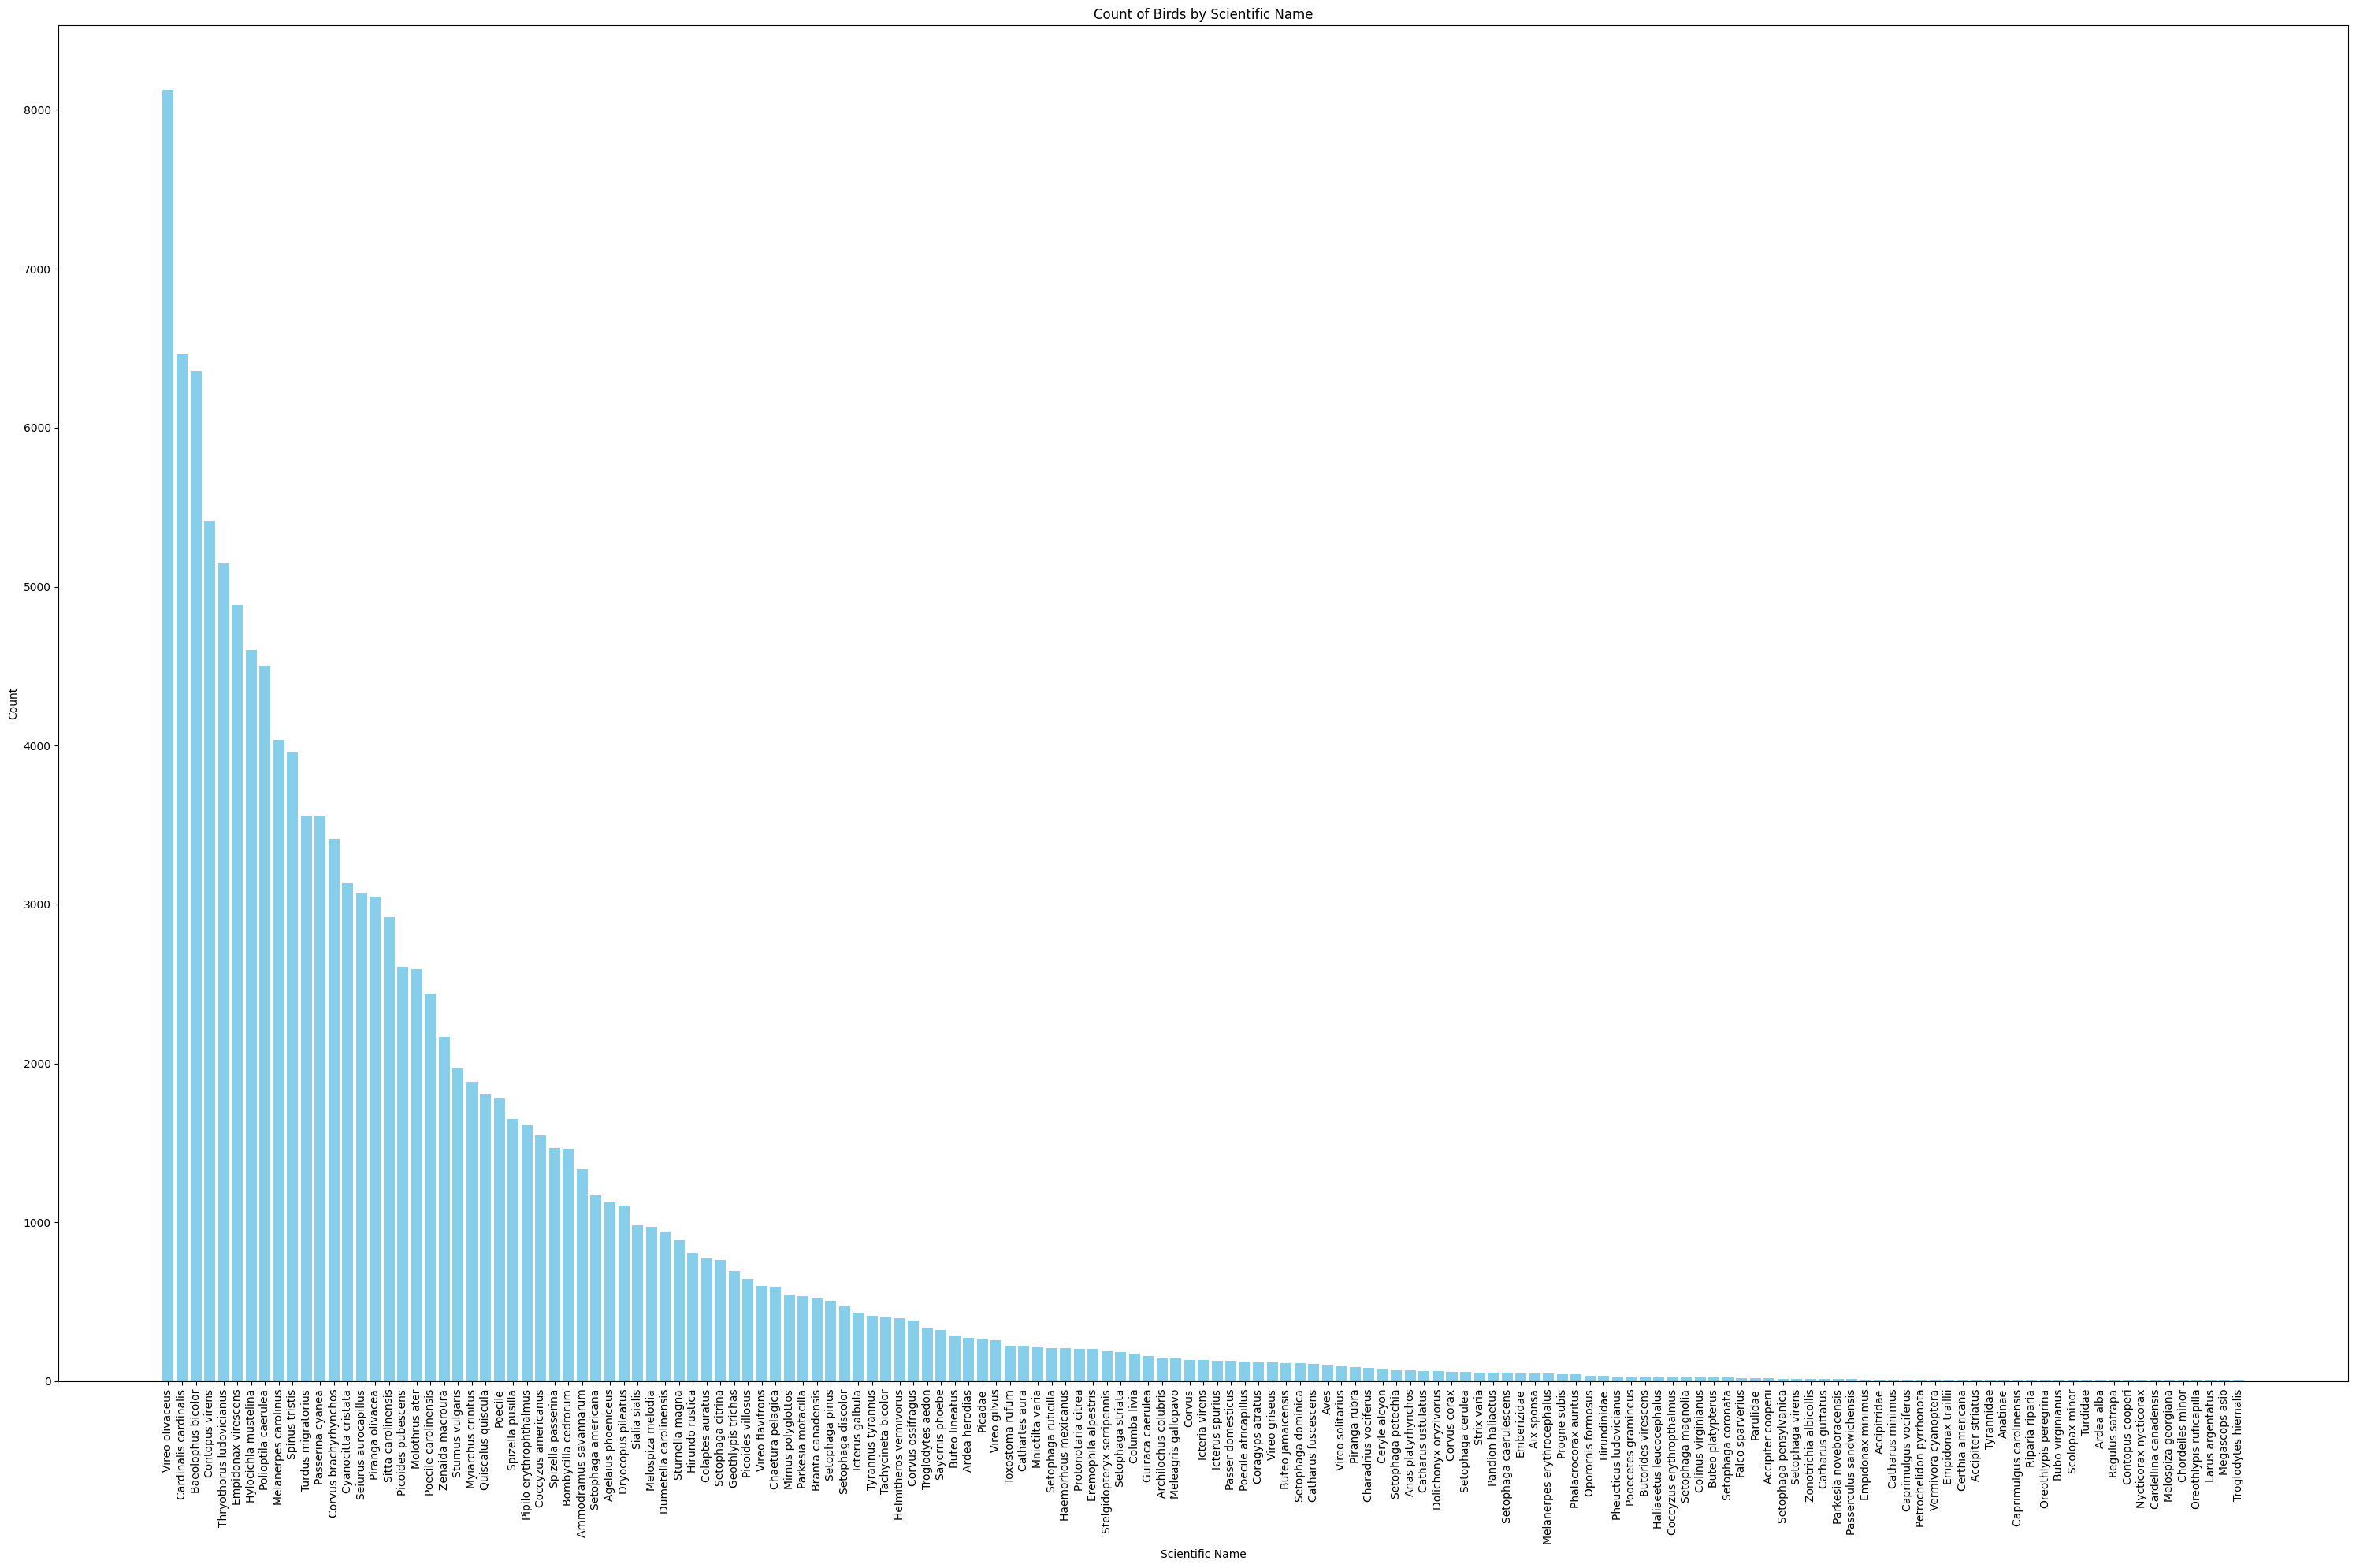

In [76]:
plt.figure(figsize=(30, 20))
plt.bar(Sciname_index[0:151], Sciname_counts[0:151], color='skyblue')
plt.xlabel('Scientific Name')
plt.ylabel('Count')
plt.title('Count of Birds by Scientific Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

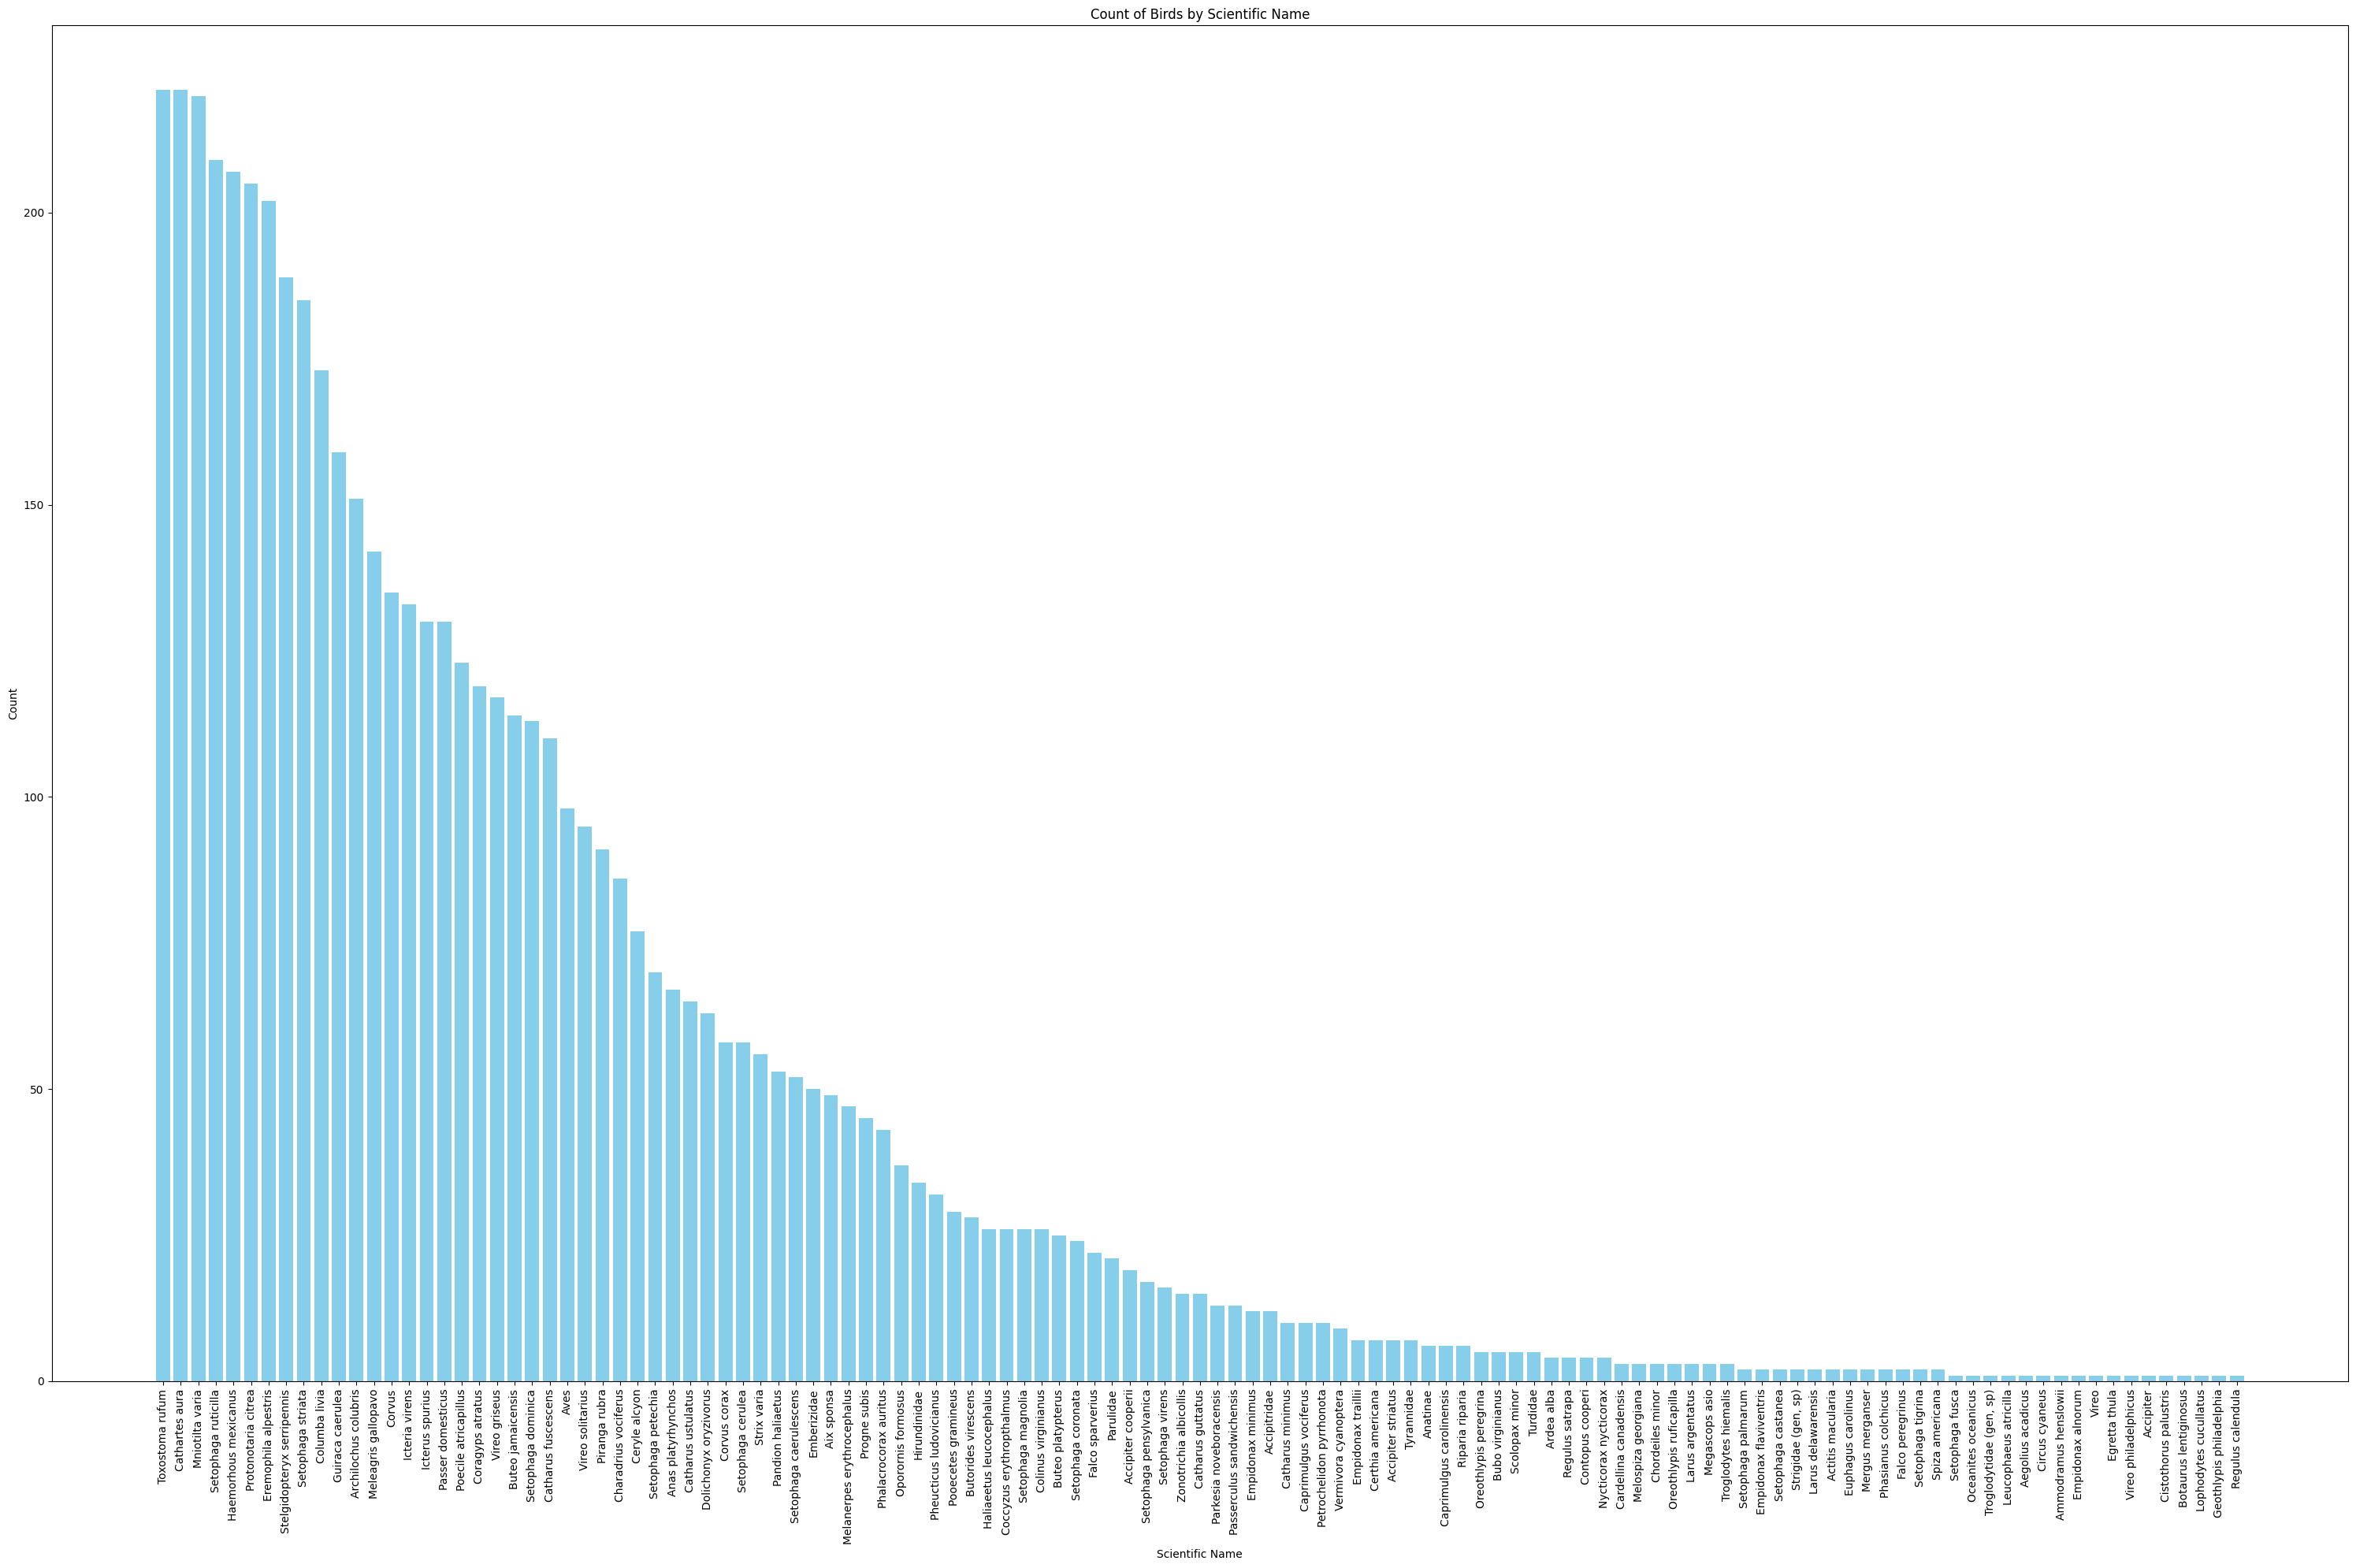

In [77]:
plt.figure(figsize=(30, 20))
plt.bar(Sciname_index[-120:-1], Sciname_counts[-120:-1], color='skyblue')
plt.xlabel('Scientific Name')
plt.ylabel('Count')
plt.title('Count of Birds by Scientific Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [78]:
merged_df[merged_df['AcceptedTSN'].isnull()]

Admin_Unit_Code  Plot_Name Location_Type  Year       Date Start_Time  \
149               ANTI  ANTI-0207        Forest  2015 2015-05-23   07:12:00   
916               ANTI  ANTI-0078        Forest  2007 2007-06-19   06:53:00   
1374              ANTI  ANTI-0190        Forest  2009 2009-07-22   06:52:00   
1559              ANTI  ANTI-0190        Forest  2011 2011-05-24   09:42:00   
2355              ANTI  ANTI-0025        Forest  2015 2015-05-25   07:24:00   
...                ...        ...           ...   ...        ...        ...   
122182            PRWI  PRWI-0480        Forest  2017 2017-07-16   06:47:00   
123603            ROCR  ROCR-0004        Forest  2007 2007-05-09   09:39:00   
124867            ROCR  ROCR-0186        Forest  2014 2014-06-23   07:13:00   
125515            ROCR  ROCR-0079        Forest  2016 2016-07-03   08:54:00   
126245            WOTR  WOTR-0008        Forest  2013 2013-07-06   08:04:00   

        End_Time          Observer  Visit Interval_Length  ... AOU_Code  \
149     07:22:00     Allison Hanna      1    7.5 - 10 min  ...     UNBI   
916     07:10:00     Sarah Goodwin      2    7.5 - 10 min  ...     HOFI   
1374    07:02:00    Marshall Edens      2    7.5 - 10 min  ...     HOFI   
1559    09:52:00    James Petersen      1     5 - 7.5 min  ...     HOFI   
2355    07:34:00      Josh Schlict      1       0-2.5 min  ...     HOFI   
...          ...               ...    ...             ...  ...      ...   
122182  06:57:00  Elizabeth Tymkiw      2     5 - 7.5 min  ...     HOFI   
123603  09:49:00     Sarah Goodwin      1     2.5 - 5 min  ...     HOFI   
124867  07:23:00     Conor Higgins      2     2.5 - 5 min  ...     UNBI   
125515  09:04:00    Brendan Hobart      2    7.5 - 10 min  ...     HOFI   
126245  08:14:00  Elizabeth Tymkiw      2       0-2.5 min  ...     HOFI   

       PIF_Watchlist_Status  Regional_Stewardship_Status  Temperature  \
149                   False                        False     8.400000   
916                   False                        False    20.900000   
1374                  False                        False    18.000000   
1559                  False                        False    29.299999   
2355                  False                        False    19.600000   
...                     ...                          ...          ...   
122182                False                        False    21.000000   
123603                False                        False    21.000000   
124867                False                        False    21.500000   
125515                False                        False    20.100000   
126245                False                        False    26.000000   

         Humidity                  Sky                                   Wind  \
149     73.199997  Clear or Few Clouds  Calm (< 1 mph) smoke rises vertically   
916     88.000000  Clear or Few Clouds  Calm (< 1 mph) smoke rises vertically   
1374    90.000000      Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
1559    68.000000  Clear or Few Clouds  Calm (< 1 mph) smoke rises vertically   
2355    76.199997  Clear or Few Clouds  Calm (< 1 mph) smoke rises vertically   
...           ...                  ...                                    ...   
122182  82.000000      Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
123603  77.000000      Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
124867  87.300003  Clear or Few Clouds  Calm (< 1 mph) smoke rises vertically   
125515  74.900002      Cloudy/Overcast  Calm (< 1 mph) smoke rises vertically   
126245  71.000000  Clear or Few Clouds  Calm (< 1 mph) smoke rises vertically   

                     Disturbance Initial_Three_Min_Cnt  \
149           No effect on count                 False   
916           No effect on count                 False   
1374          No effect on count                 False   
1559      Slight effect on count                 False   
2355      Slight 

The Accepted_TSN (Taxonomic Serial Number) column in this dataset refers to a unique identifier for each bird species. These identifiers are maintained by the Integrated Taxonomic Information System (ITIS), which provides authoritative taxonomic information on plants, animals, fungi, and microbes of North America and the world.

In [79]:
###drop rows whose accepted tsn is null
merged_df.dropna(subset=['AcceptedTSN'], inplace=True)

In [80]:
merged_df.isnull().sum()

Admin_Unit_Code                 0
Plot_Name                       0
Location_Type                   0
Year                            0
Date                            0
Start_Time                      0
End_Time                        0
Observer                        0
Visit                           0
Interval_Length                 0
ID_Method                       0
Distance                        0
Flyover_Observed                0
Sex                             0
Common_Name                     0
Scientific_Name                 0
AcceptedTSN                     0
NPSTaxonCode                    0
AOU_Code                        0
PIF_Watchlist_Status            0
Regional_Stewardship_Status     0
Temperature                    10
Humidity                       99
Sky                            10
Wind                           10
Disturbance                    10
Initial_Three_Min_Cnt           0
Park_Name                       0
dtype: int64

In [81]:
merged_df['Temperature'].fillna(merged_df['Temperature'].mode()[0], inplace=True)
merged_df['Humidity'].fillna(merged_df['Humidity'].mode()[0], inplace=True)
merged_df['Sky'].fillna(merged_df['Sky'].mode()[0], inplace=True)
merged_df['Wind'].fillna(merged_df['Wind'].mode()[0], inplace=True)
merged_df['Disturbance'].fillna(merged_df['Disturbance'].mode()[0], inplace=True)



In [82]:
merged_df.isnull().sum()

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
NPSTaxonCode                   0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
Park_Name                      0
dtype: int64

Finall all the null values are either replaced or dropped.

In [83]:
merged_df.dtypes

Admin_Unit_Code                        object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                     int64
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                          float64
AOU_Code                               object
PIF_Watchlist_Status                     bool
Regional_Stewardship_Status              bool
Temperature                       

In [84]:
merged_df.Sky.unique()

array(['Cloudy/Overcast', 'Clear or Few Clouds', 'Partly Cloudy',
       'Mist/Drizzle', 'Fog', 'Rain Showers'], dtype=object)

In [85]:
merged_df['Sky'] = merged_df['Sky'].map({'Clear or Few Clouds': 0, 'Partly Cloudy': 1, 'Cloudy/Overcast': 2, 'Mist/Drizzle': 3, 'Fog': 4, 'Rain Showers': 5})


In [86]:
maps={'Clear or Few Clouds': 0, 'Partly Cloudy': 1, 'Cloudy/Overcast': 2, 'Mist/Drizzle': 3, 'Fog': 4, 'Rain Showers': 5}

In [87]:
sky_index=merged_df.Sky.value_counts().index

In [88]:
sky_values=merged_df.Sky.value_counts().values

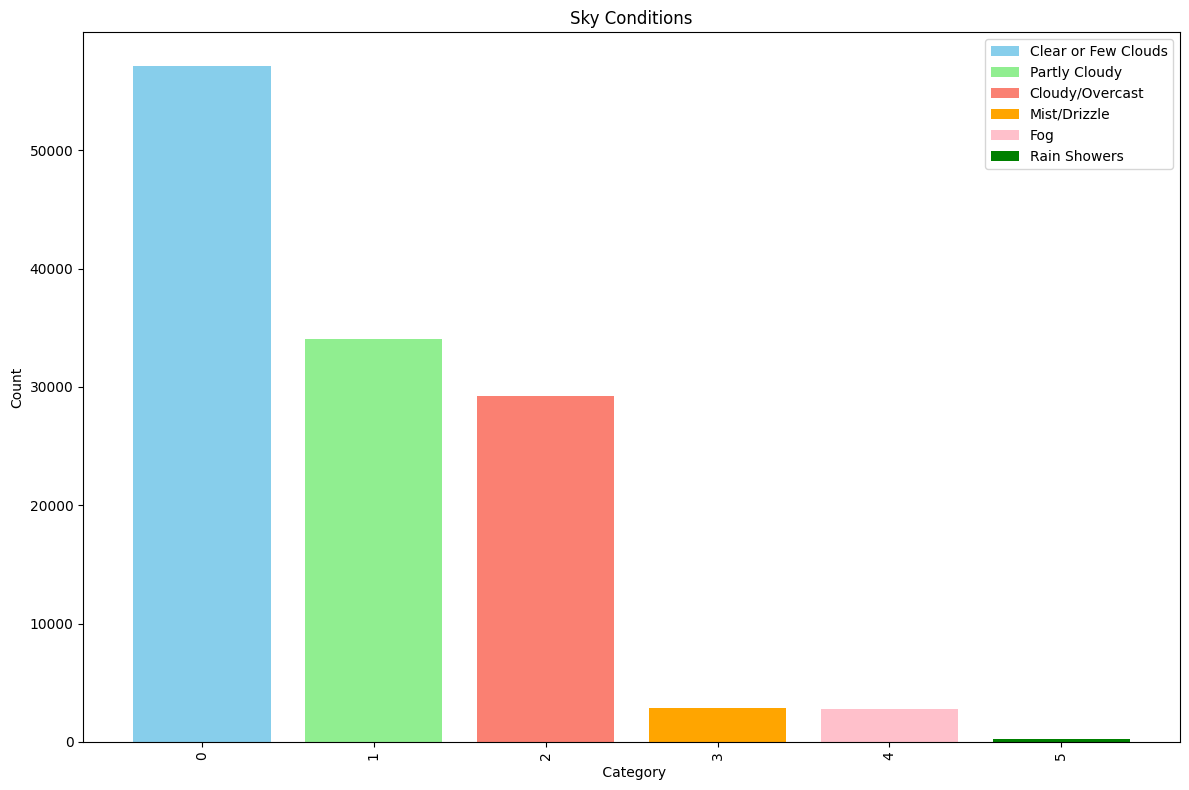

In [89]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Define colors for each bar and corresponding labels
colors = ['skyblue', 'lightgreen', 'salmon','orange','pink','green']
color_labels = ['Clear or Few Clouds', 'Partly Cloudy', 'Cloudy/Overcast','Mist/Drizzle','Fog','Rain Showers']

plt.figure(figsize=(12, 8))
bars = plt.bar(sky_index, sky_values, color=colors)
plt.xlabel(' Category')
plt.ylabel('Count')
plt.title('Sky Conditions')

# Create custom legend
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, color_labels)]
plt.legend(handles=legend_elements)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [90]:
merged_df.Wind.unique()

array(['Calm (< 1 mph) smoke rises vertically',
       'Light breeze (4-7 mph) wind felt on face',
       'Light air movement (1-3 mph) smoke drifts',
       'Gentle breeze (8-12 mph), leaves in motion',
       'Moderate breeze (13-18 mph), moves small branches',
       'Fresh breeze (19-24 mph), small trees sway'], dtype=object)

In [91]:
##lets map Wind column
merged_df['Wind']=merged_df['Wind'].map({'Calm (< 1 mph) smoke rises vertically':0,
       'Light breeze (4-7 mph) wind felt on face':1,
       'Light air movement (1-3 mph) smoke drifts':2,
       'Gentle breeze (8-12 mph), leaves in motion':3,
       'Moderate breeze (13-18 mph), moves small branches':4,
       'Fresh breeze (19-24 mph), small trees sway':5})

In [92]:
wind_ind=merged_df.Wind.value_counts().index
wind_ind

Index([0, 2, 1, 3, 4, 5], dtype='int64', name='Wind')

In [93]:
wind_val=merged_df.Wind.value_counts().values
wind_val

array([72508, 32215, 15937,  4806,   698,    59])

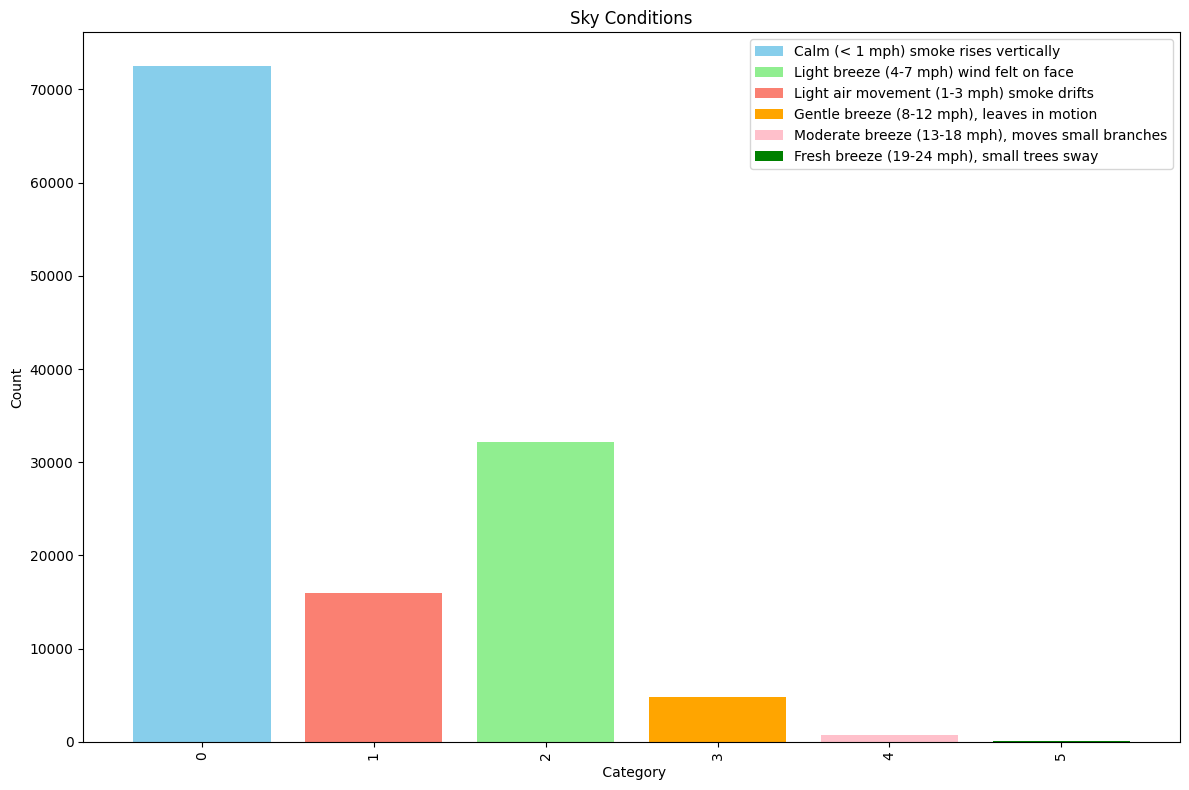

In [94]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Define colors for each bar and corresponding labels
colors = ['skyblue', 'lightgreen', 'salmon','orange','pink','green']
color_labels = ['Calm (< 1 mph) smoke rises vertically',
       'Light breeze (4-7 mph) wind felt on face',
       'Light air movement (1-3 mph) smoke drifts',
       'Gentle breeze (8-12 mph), leaves in motion',
       'Moderate breeze (13-18 mph), moves small branches',
       'Fresh breeze (19-24 mph), small trees sway']

plt.figure(figsize=(12, 8))
bars = plt.bar(wind_ind, wind_val, color=colors)
plt.xlabel(' Category')
plt.ylabel('Count')
plt.title('Sky Conditions')

# Create custom legend
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, color_labels)]
plt.legend(handles=legend_elements)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [95]:
#with pd.ExcelWriter('merged_dataset.xlsx', engine='xlsxwriter') as writer:
 #   merged_df.to_excel(writer, index=False)

In [96]:
merged_df.Disturbance.unique()

array(['No effect on count', 'Slight effect on count',
       'Moderate effect on count', 'Serious effect on count'],
      dtype=object)

In [97]:
disturbance_index=merged_df.Disturbance.value_counts().index
disturbance_index

Index(['No effect on count', 'Slight effect on count',
       'Moderate effect on count', 'Serious effect on count'],
      dtype='object', name='Disturbance')

In [98]:
disturbance_values=merged_df.Disturbance.value_counts().values
disturbance_values

array([70454, 38077, 14165,  3527])

In [99]:
merged_df['Disturbance']=merged_df['Disturbance'].map({'No effect on count':0,'Slight effect on count':1,'Moderate effect on count':2,'Serious effect on count':3})

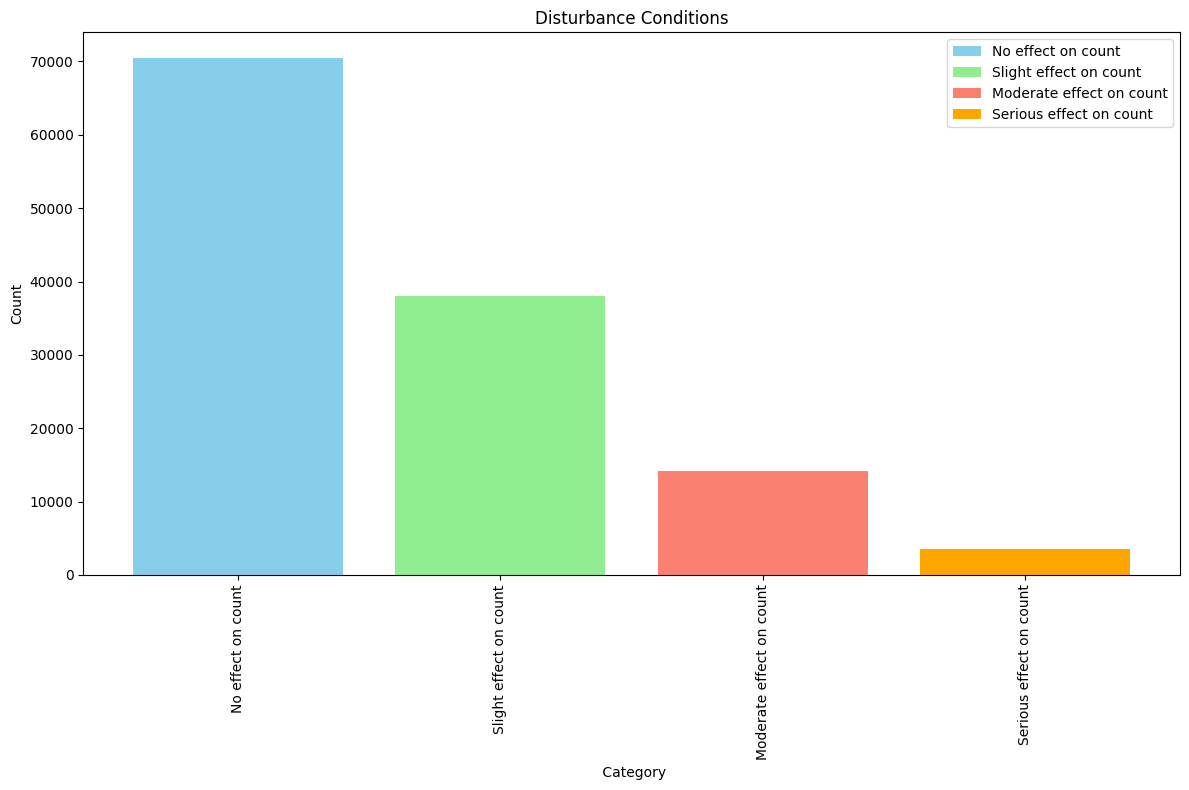

In [100]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Define colors for each bar and corresponding labels
colors = ['skyblue', 'lightgreen', 'salmon','orange']
color_labels = ['No effect on count', 'Slight effect on count',
       'Moderate effect on count', 'Serious effect on count']

plt.figure(figsize=(12, 8))
bars = plt.bar(disturbance_index, disturbance_values, color=colors)
plt.xlabel(' Category')
plt.ylabel('Count')
plt.title('Disturbance Conditions')

# Create custom legend
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, color_labels)]
plt.legend(handles=legend_elements)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-101-1a5c29f04bf3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Initial_Three_Min_Cnt', data=merged_df, palette='viridis')


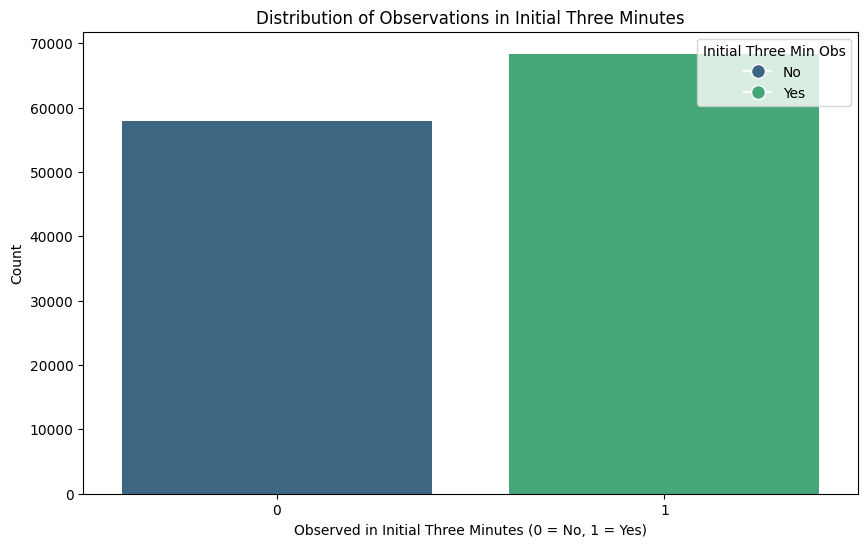

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert boolean to integer
merged_df['Initial_Three_Min_Cnt'] = merged_df['Initial_Three_Min_Cnt'].astype(int)

# Plot the distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Initial_Three_Min_Cnt', data=merged_df, palette='viridis')

# Retrieve the colors used in the plot
colors = [item.get_facecolor() for item in ax.patches]

# Add a legend with correct colors
legend_labels = ['No', 'Yes']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(handles=handles, labels=legend_labels, title='Initial Three Min Obs', loc='upper right')

plt.xlabel('Observed in Initial Three Minutes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Observations in Initial Three Minutes')
plt.show()


In [102]:
merged_df.Date

0        2008-05-28
1        2008-05-28
2        2008-05-28
3        2008-05-28
4        2008-05-28
            ...    
126568   2014-06-06
126569   2014-06-06
126570   2014-06-06
126571   2014-06-06
126572   2014-06-06
Name: Date, Length: 126223, dtype: datetime64[ns]

In [103]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [104]:
merged_df.drop(['Year'],axis=1,inplace=True)

In [105]:
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day

In [106]:
merged_df.head()

Admin_Unit_Code  Plot_Name Location_Type       Date Start_Time  End_Time  \
0            ANTI  ANTI-0207        Forest 2008-05-28   06:42:00  06:52:00   
1            ANTI  ANTI-0207        Forest 2008-05-28   06:42:00  06:52:00   
2            ANTI  ANTI-0207        Forest 2008-05-28   06:42:00  06:52:00   
3            ANTI  ANTI-0207        Forest 2008-05-28   06:42:00  06:52:00   
4            ANTI  ANTI-0207        Forest 2008-05-28   06:42:00  06:52:00   

          Observer  Visit Interval_Length ID_Method  ... Temperature  \
0  Desiree Narango      1       0-2.5 min   Calling  ...        15.6   
1  Desiree Narango      1       0-2.5 min   Calling  ...        15.6   
2  Desiree Narango      1       0-2.5 min   Calling  ...        15.6   
3  Desiree Narango      1       0-2.5 min   Singing  ...        15.6   
4  Desiree Narango      1       0-2.5 min   Calling  ...        15.6   

   Humidity  Sky Wind Disturbance  Initial_Three_Min_Cnt  \
0      57.0    2    0           0                      1   
1      57.0    2    0           0                      1   
2      57.0    2    0           0                      1   
3      57.0    2    0           0                      1   
4      57.0    2    0           0                      1   

                       Park_Name  Year  Month  Day  
0  Antietam National Battlefield  2008      5   28  
1  Antietam National Battlefield  2008      5   28  
2  Antietam National Battlefield  2008      5   28  
3  Antietam National Battlefield  2008      5   28  
4  Antietam National Battlefield  2008      5   28  

[5 rows x 30 columns]

In [107]:
merged_df.drop(['Date'], axis=1, inplace=True)

In [108]:
merged_df.drop(columns=['Start_Time','End_Time'],axis=1,inplace=True)

In [109]:
merged_df.head(2)

Admin_Unit_Code  Plot_Name Location_Type         Observer  Visit  \
0            ANTI  ANTI-0207        Forest  Desiree Narango      1   
1            ANTI  ANTI-0207        Forest  Desiree Narango      1   

  Interval_Length ID_Method         Distance  Flyover_Observed  Sex  ...  \
0       0-2.5 min   Calling     <= 50 Meters             False    2  ...   
1       0-2.5 min   Calling  50 - 100 Meters             False    2  ...   

  Temperature Humidity  Sky  Wind Disturbance  Initial_Three_Min_Cnt  \
0        15.6     57.0    2     0           0                      1   
1        15.6     57.0    2     0           0                      1   

                       Park_Name  Year  Month  Day  
0  Antietam National Battlefield  2008      5   28  
1  Antietam National Battlefield  2008      5   28  

[2 rows x 27 columns]

In [110]:
##lets change the datatype of PIF_Watchlist_Status column to object
merged_df['PIF_Watchlist_Status']=merged_df['PIF_Watchlist_Status'].astype('object')

In [111]:
merged_df.PIF_Watchlist_Status

0         False
1         False
2         False
3         False
4         False
          ...  
126568    False
126569    False
126570    False
126571    False
126572    False
Name: PIF_Watchlist_Status, Length: 126223, dtype: object

In [112]:
###map with 0 and 1
merged_df['PIF_Watchlist_Status']=merged_df['PIF_Watchlist_Status'].map({False:0,True:1})

In [113]:
merged_df.PIF_Watchlist_Status

0         0
1         0
2         0
3         0
4         0
         ..
126568    0
126569    0
126570    0
126571    0
126572    0
Name: PIF_Watchlist_Status, Length: 126223, dtype: int64

<ipython-input-114-c1c0400395a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='PIF_Watchlist_Status', data=merged_df, palette="viridis")


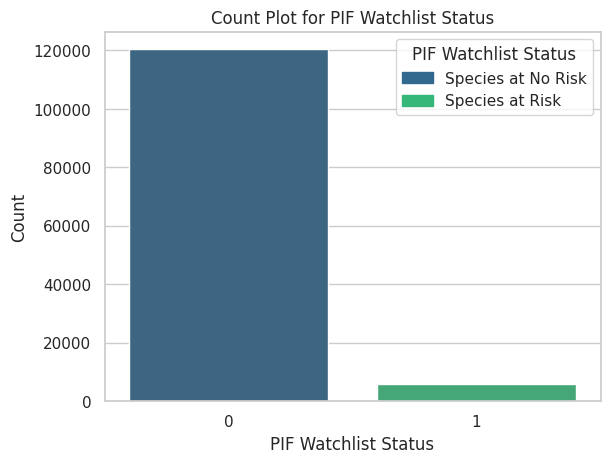

In [114]:
##lets plot countsplot
# Plotting the count plot with proper legend labels
sns.set(style="whitegrid")
ax = sns.countplot(x='PIF_Watchlist_Status', data=merged_df, palette="viridis")

# Adding the legend with proper labels
mapping = {0: 'Species at No Risk', 1: 'Species at Risk'}
handles = [plt.Rectangle((0, 0), 1, 1, color=col) for col in sns.color_palette("viridis", 2)]
labels = [mapping[key] for key in mapping.keys()]
ax.legend(handles, labels, title='PIF Watchlist Status')

plt.title('Count Plot for PIF Watchlist Status')
plt.xlabel('PIF Watchlist Status')
plt.ylabel('Count')
plt.show()

The column typically contains binary values 1/0.

 '1' indicates that the species is on the PIF Watch List and is of high conservation concern.

'0' indicates that the species is not on the watch list and is considered to be at lower risk.

In [115]:
###map with 0 and 1
merged_df['Regional_Stewardship_Status']=merged_df['Regional_Stewardship_Status'].map({False:0,True:1})

In [116]:
merged_df.Regional_Stewardship_Status.value_counts().values

array([91908, 34315])

In [117]:
merged_df.Regional_Stewardship_Status.value_counts().index

Index([0, 1], dtype='int64', name='Regional_Stewardship_Status')

<ipython-input-118-32da73cac587>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Regional_Stewardship_Status', data=merged_df, palette=palette)


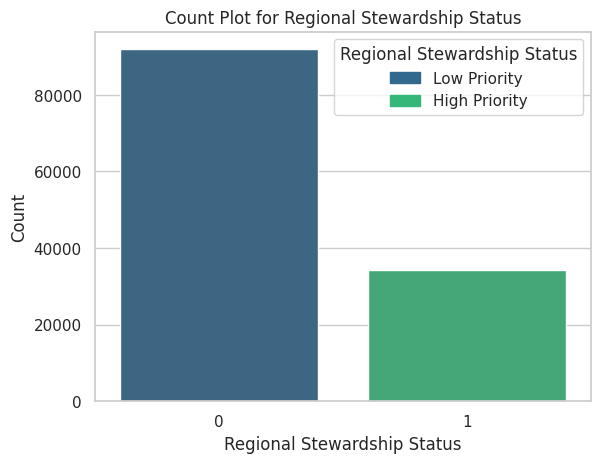

In [118]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", 2)
ax = sns.countplot(x='Regional_Stewardship_Status', data=merged_df, palette=palette)

# Adding the legend with proper labels
mapping = {0: 'Low Priority', 1: 'High Priority'}
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(2)]
labels = [mapping[key] for key in mapping.keys()]
ax.legend(handles, labels, title='Regional Stewardship Status')

plt.title('Count Plot for Regional Stewardship Status')
plt.xlabel('Regional Stewardship Status')
plt.ylabel('Count')
plt.show()

The Regional_Stewardship_Status column  signifies the priority level assigned to bird species for regional conservation efforts. This classification is often used to identify and prioritize species that require specific management actions within a particular geographic region.

In [119]:
flyover_mapping = {True: 1, False: 0}
merged_df['Flyover_Observed'] = merged_df['Flyover_Observed'].map(flyover_mapping)

In [120]:
merged_df.Flyover_Observed.value_counts().values

array([118966,   7257])

In [121]:
merged_df.Flyover_Observed.value_counts().index

Index([0, 1], dtype='int64', name='Flyover_Observed')

<ipython-input-122-7cf7c4452c9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Flyover_Observed', data=merged_df, palette=palette)


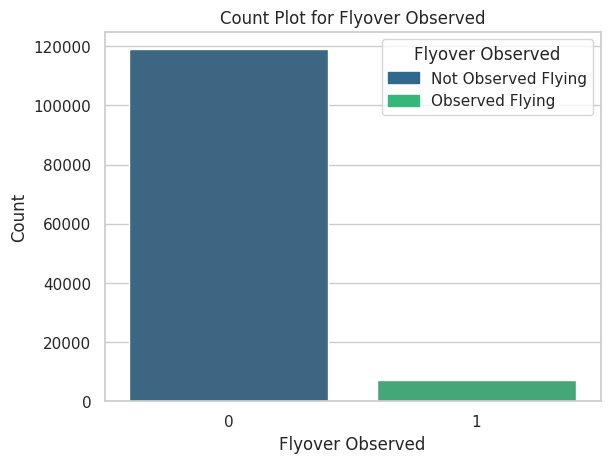

In [122]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", 2)
ax = sns.countplot(x='Flyover_Observed', data=merged_df, palette=palette)

# Adding the legend with proper labels
flyover_mapping = {1: 'Not Observed Flying', 0: 'Observed Flying'}
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(2)]
labels = [flyover_mapping[key] for key in flyover_mapping.keys()]
ax.legend(handles, labels, title='Flyover Observed')

plt.title('Count Plot for Flyover Observed')
plt.xlabel('Flyover Observed')
plt.ylabel('Count')
plt.show()

The Flyover Observed column  dataset signifies the birds observed and monitored while flying or not.

In [123]:
#with pd.ExcelWriter('merged_dataset.xlsx', engine='xlsxwriter') as writer:
   # merged_df.to_excel(writer, index=False)

QUARTILE ANALYSIS

In [124]:
# Quartile Analysis
columns = ['Temperature', 'Humidity', 'Wind', 'Sky','Disturbance']
quartiles = merged_df[columns].quantile([0.25, 0.5, 0.75])
print("\nQuartile Analysis:\n", quartiles)



Quartile Analysis:
       Temperature   Humidity  Wind  Sky  Disturbance
0.25    18.200001  71.800003   0.0  0.0          0.0
0.50    21.100000  80.000000   0.0  1.0          0.0
0.75    23.500000  86.300003   2.0  2.0          1.0


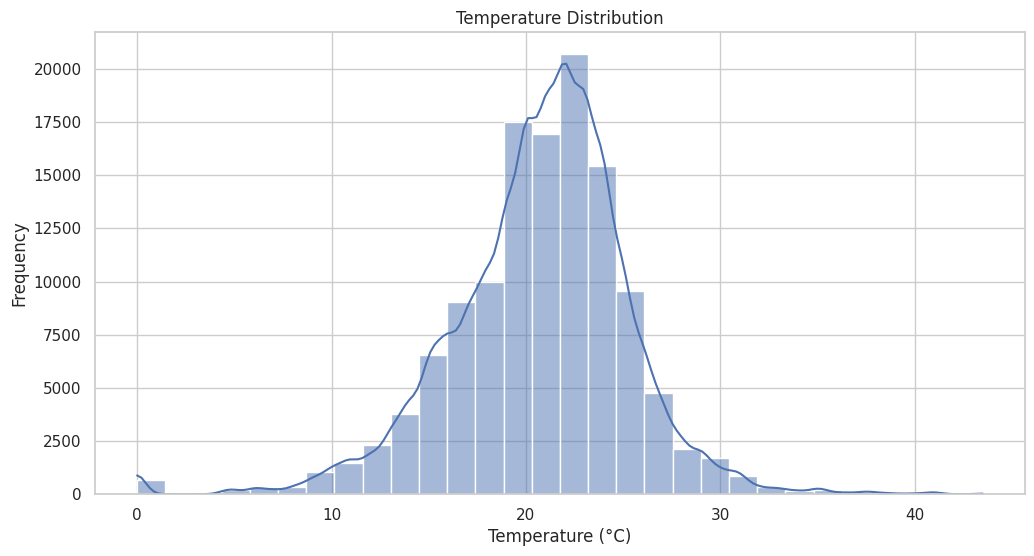

In [125]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

This plot provides a visual summary of the temperature data, showing its central tendency, spread, and overall distribution shape.

Central Tendency: The peak of the histogram and KDE curve is around 20°C, suggesting that this is the most common temperature in the dataset.

Spread: The temperatures range from just above 0°C to around 40°C, with the majority of the data concentrated between approximately 10°C and 30°C.

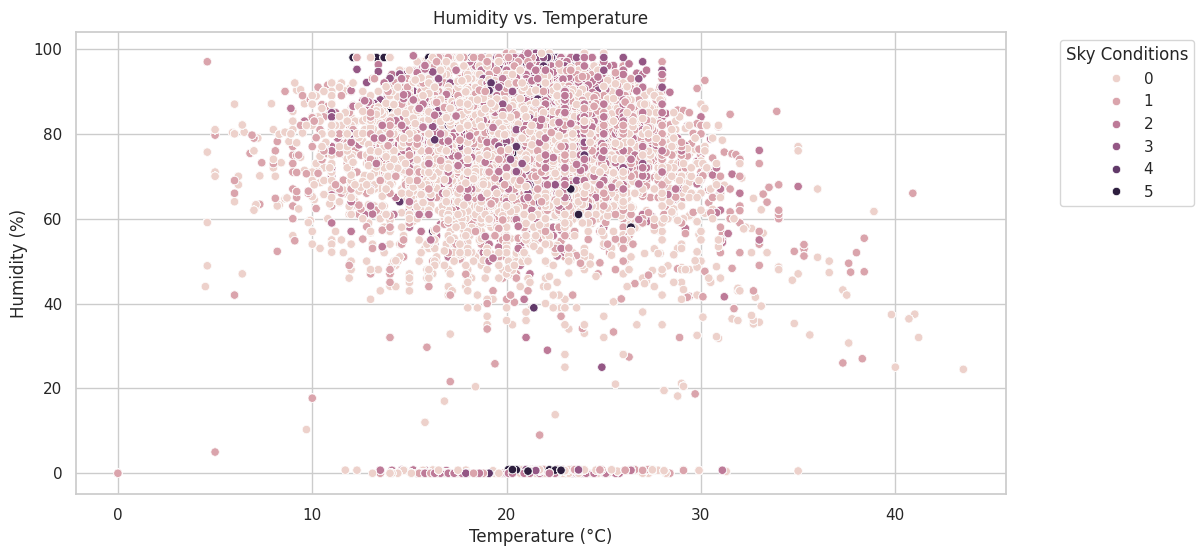

In [126]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=merged_df, hue='Sky')
plt.title('Humidity vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Sky Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot shows the relationship between humidity (%) and temperature (°C), with data points colored by sky conditions (ranging from 0 to 5). The majority of the data points cluster around high humidity levels (60-100%) across a temperature range of approximately 10°C to 30°C. Lower humidity levels are sparse, and there's a notable horizontal band of points at 0% humidity, likely indicating a specific condition or error. The sky conditions' color gradient suggests no strong visual correlation with the temperature-humidity relationship. The plot indicates that temperature has a broad distribution but humidity tends to be high.







<ipython-input-127-9cf7bae09525>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disturbance', y='Temperature', data=merged_df, palette='viridis')


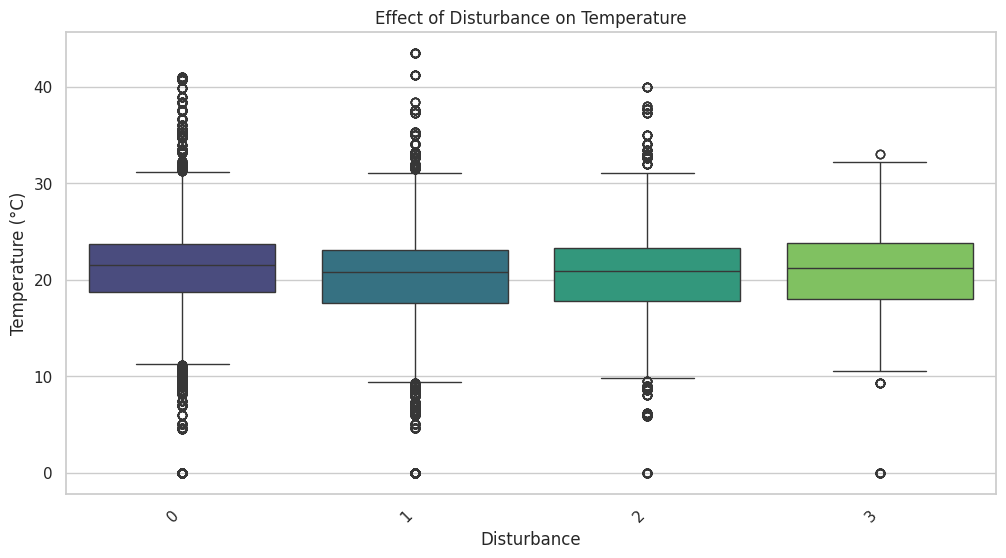

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disturbance', y='Temperature', data=merged_df, palette='viridis')
plt.title('Effect of Disturbance on Temperature')
plt.xlabel('Disturbance')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.show()

The box plot shows the effect of disturbance (0 to 3) on temperature (°C). For disturbance level 0, the median temperature is around 20°C, with an interquartile range (IQR) from about 15°C to 25°C. For disturbance level 1, the median is slightly lower at about 19°C, with an IQR from 14°C to 25°C. Disturbance level 2 has a median of around 18°C, with an IQR from 14°C to 24°C. Finally, disturbance level 3 has a median temperature of about 19°C, with an IQR from 15°C to 23°C. Outliers are present at all disturbance levels, notably above 30°C and below 5°C.

In [128]:
###lets merge year,month,day for certain observations
merged_df['Observation_Time'] = pd.to_datetime(merged_df[['Year', 'Month', 'Day']])

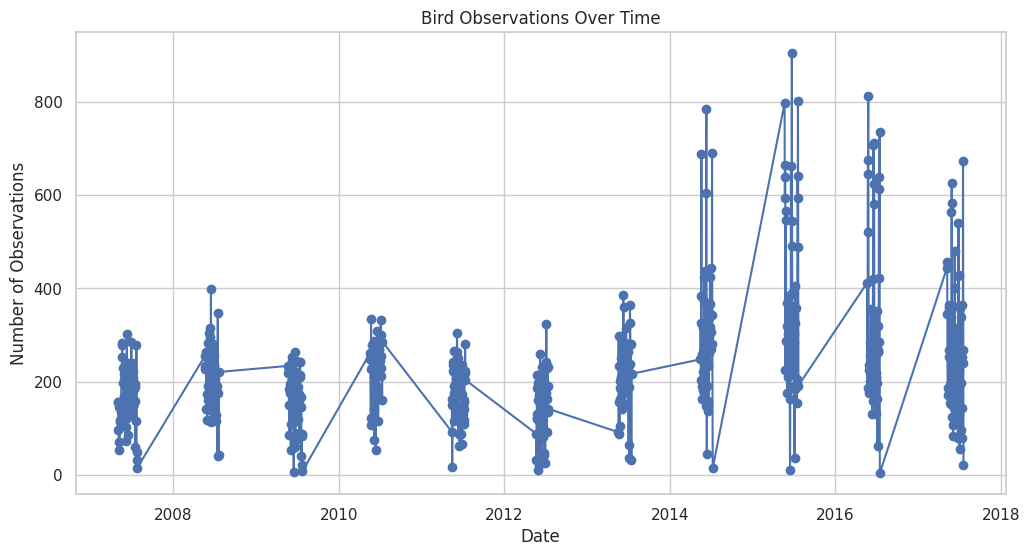

In [129]:
import matplotlib.pyplot as plt

# Convert observation date to datetime
merged_df['Observation_Date'] = pd.to_datetime(merged_df[['Year', 'Month', 'Day']])

# Group by date and count observations
time_series = merged_df.groupby('Observation_Date').size()

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, marker='o')
plt.title('Bird Observations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.show()


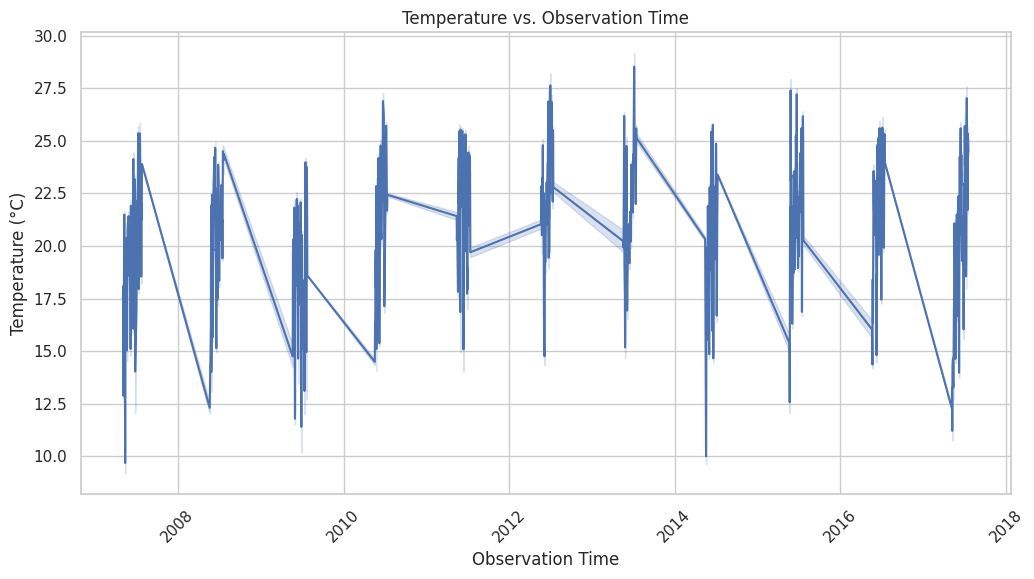

In [130]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Observation_Time', y='Temperature', data=merged_df)
plt.title('Temperature vs. Observation Time')
plt.xlabel('Observation Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-131-9c472284591c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sky', y='Humidity', data=merged_df, palette='viridis')


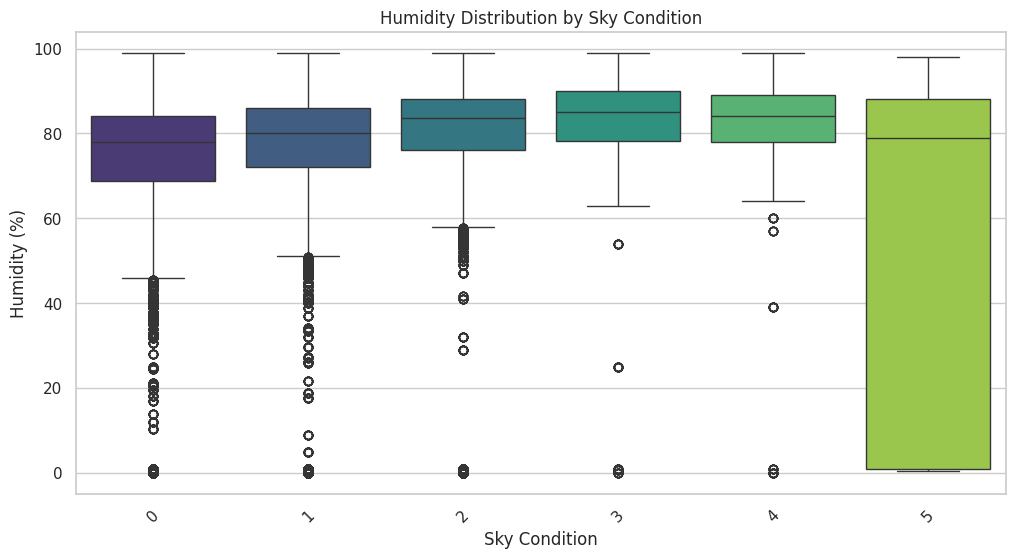

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sky', y='Humidity', data=merged_df, palette='viridis')
plt.title('Humidity Distribution by Sky Condition')
plt.xlabel('Sky Condition')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-132-9e836f3f78f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Disturbance', y='Humidity', data=merged_df, palette='viridis')


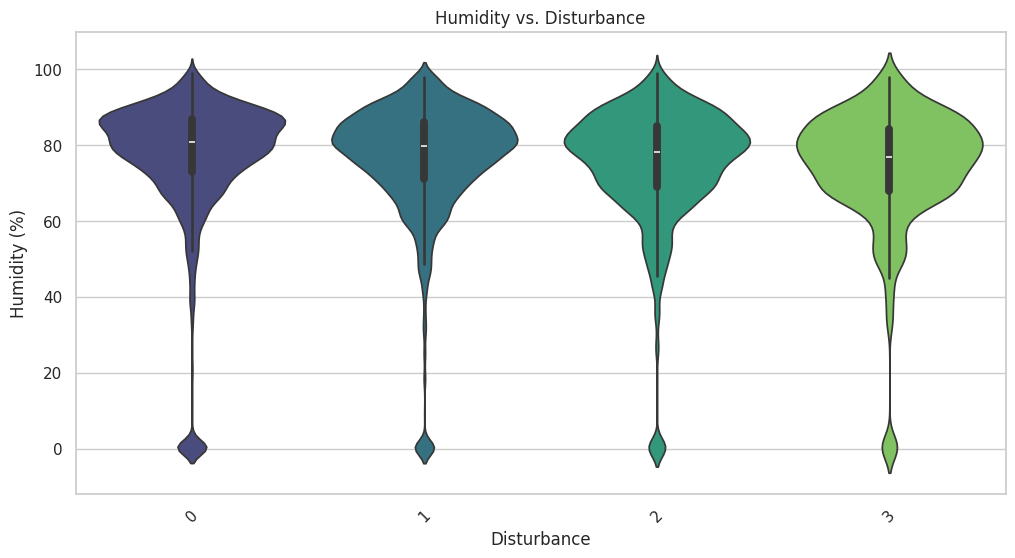

In [132]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Disturbance', y='Humidity', data=merged_df, palette='viridis')
plt.title('Humidity vs. Disturbance')
plt.xlabel('Disturbance')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.show()

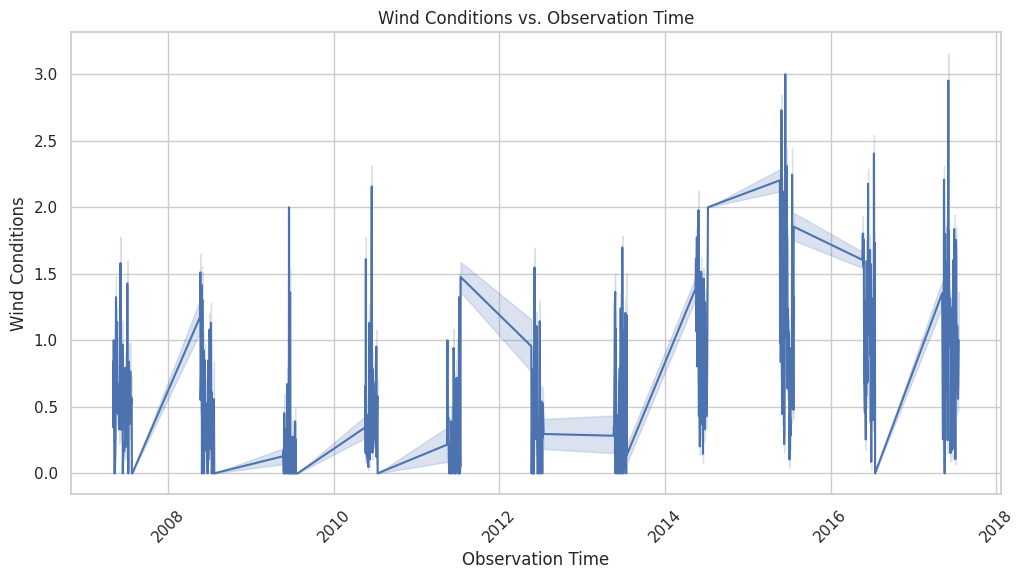

In [133]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Observation_Time', y='Wind', data=merged_df)
plt.title('Wind Conditions vs. Observation Time')
plt.xlabel('Observation Time')
plt.ylabel('Wind Conditions')
plt.xticks(rotation=45)
plt.show()

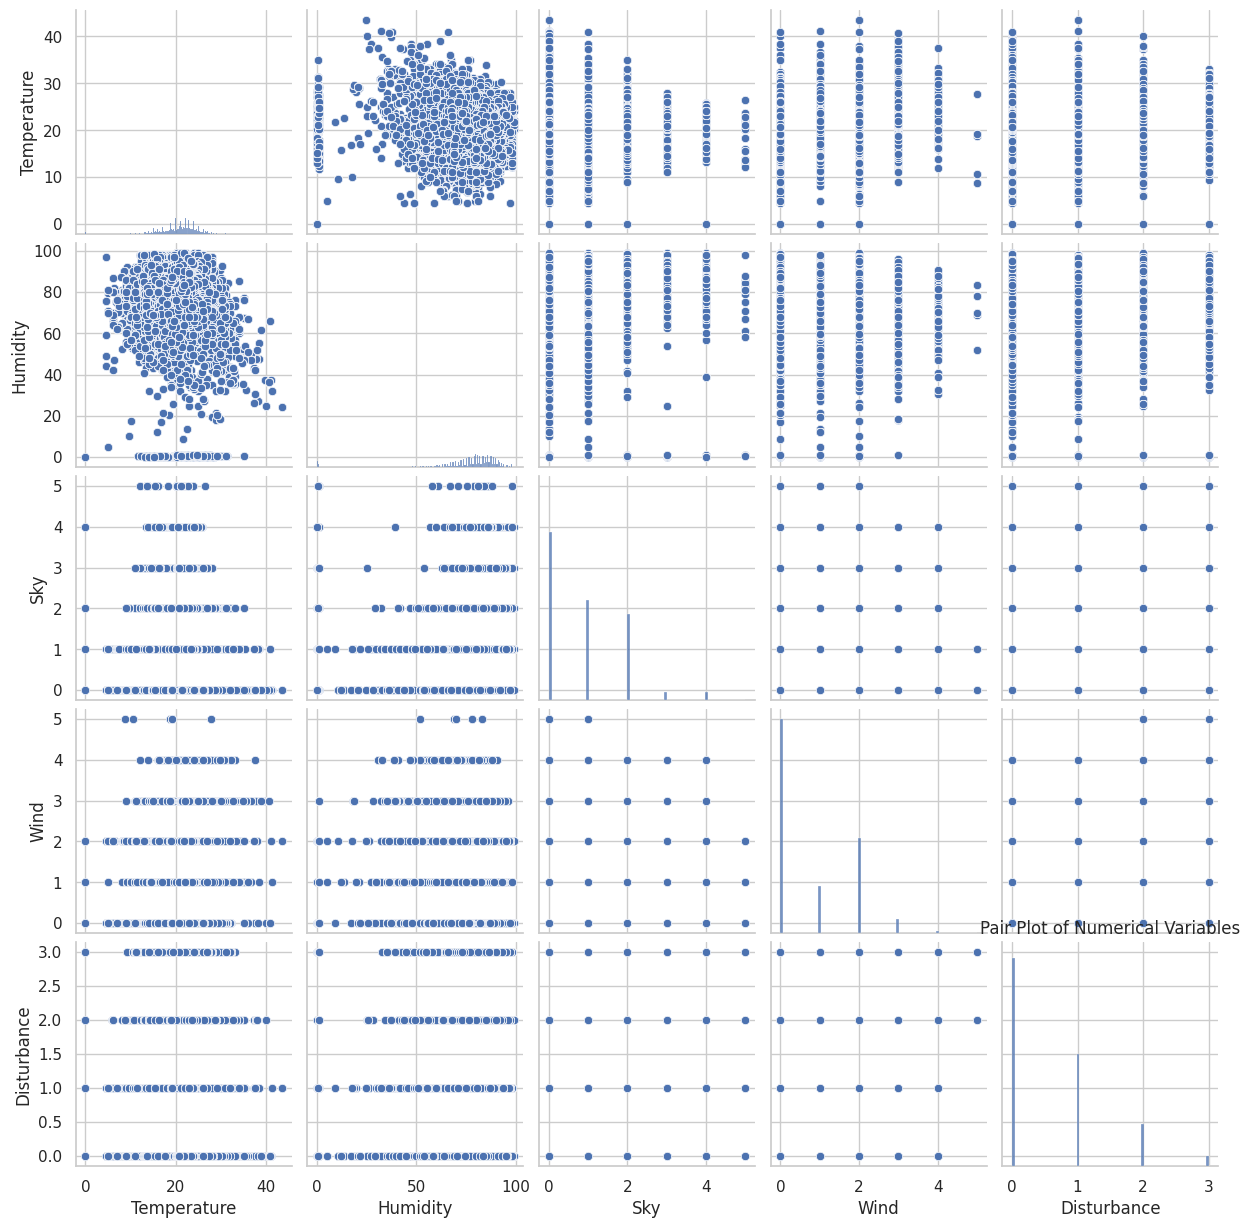

In [134]:
sns.pairplot(merged_df[['Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance']])
plt.title('Pair Plot of Numerical Variables')
plt.show()

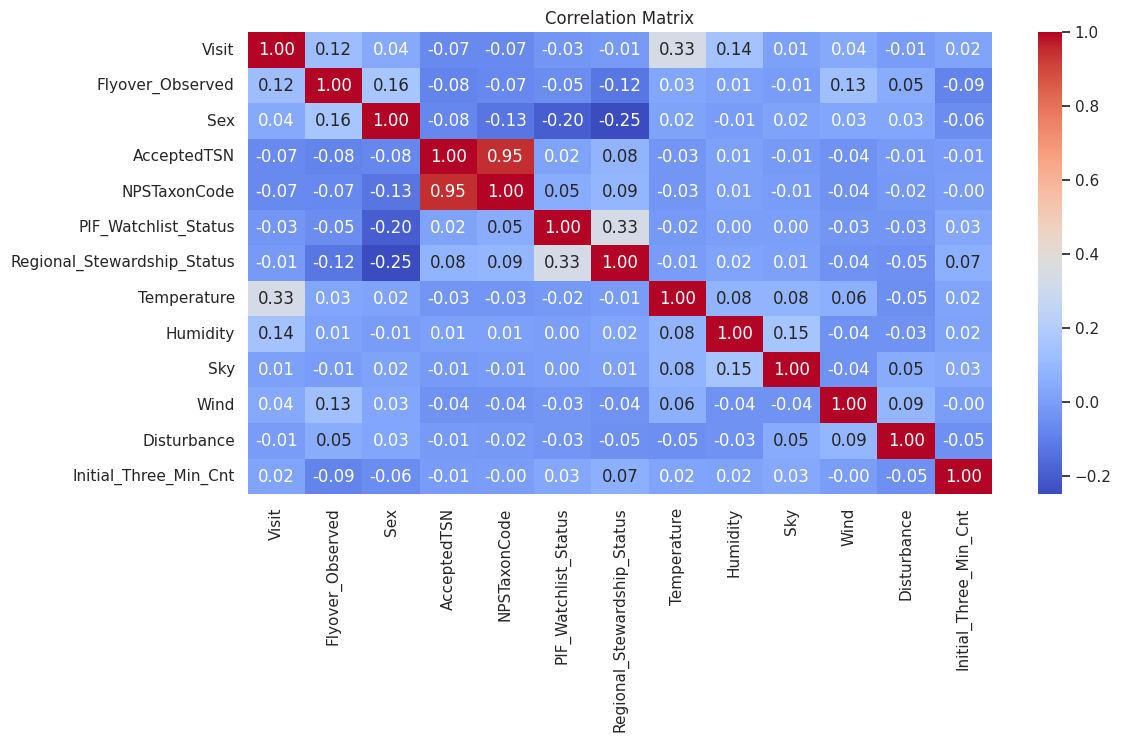

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for numeric columns
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<ipython-input-136-c3f9036096f3>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Scientific_Name', y='Temperature', data=filtered_df, ci=None, palette='viridis')
<ipython-input-136-c3f9036096f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scientific_Name', y='Temperature', data=filtered_df, ci=None, palette='viridis')


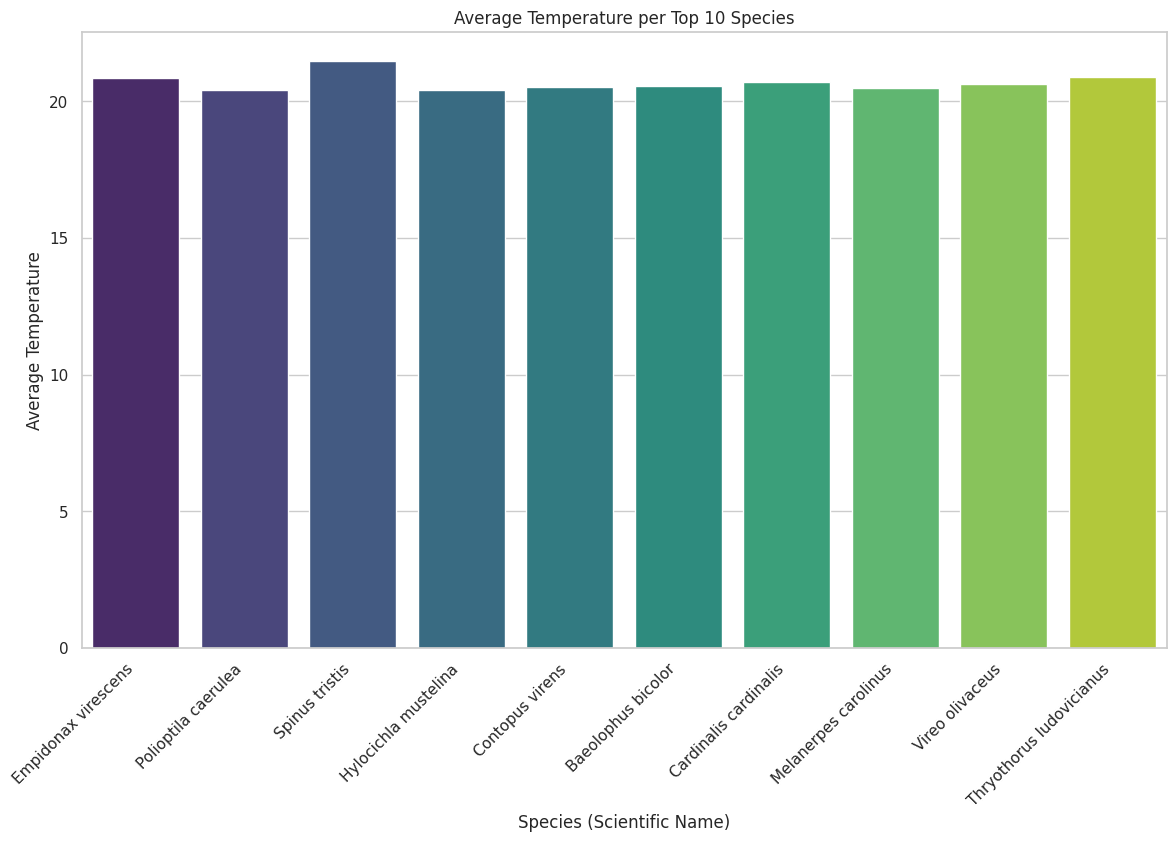

In [136]:
# Get top 10 species by count
top_10_species = merged_df['Scientific_Name'].value_counts().nlargest(10).index

# Filter the DataFrame for only these top 10 species
filtered_df = merged_df[merged_df['Scientific_Name'].isin(top_10_species)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Scientific_Name', y='Temperature', data=filtered_df, ci=None, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Temperature per Top 10 Species')
plt.xlabel('Species (Scientific Name)')
plt.ylabel('Average Temperature')
plt.show()


<ipython-input-137-0ba165f194f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scientific_Name', y='Temperature', data=filtered_df, palette='viridis')


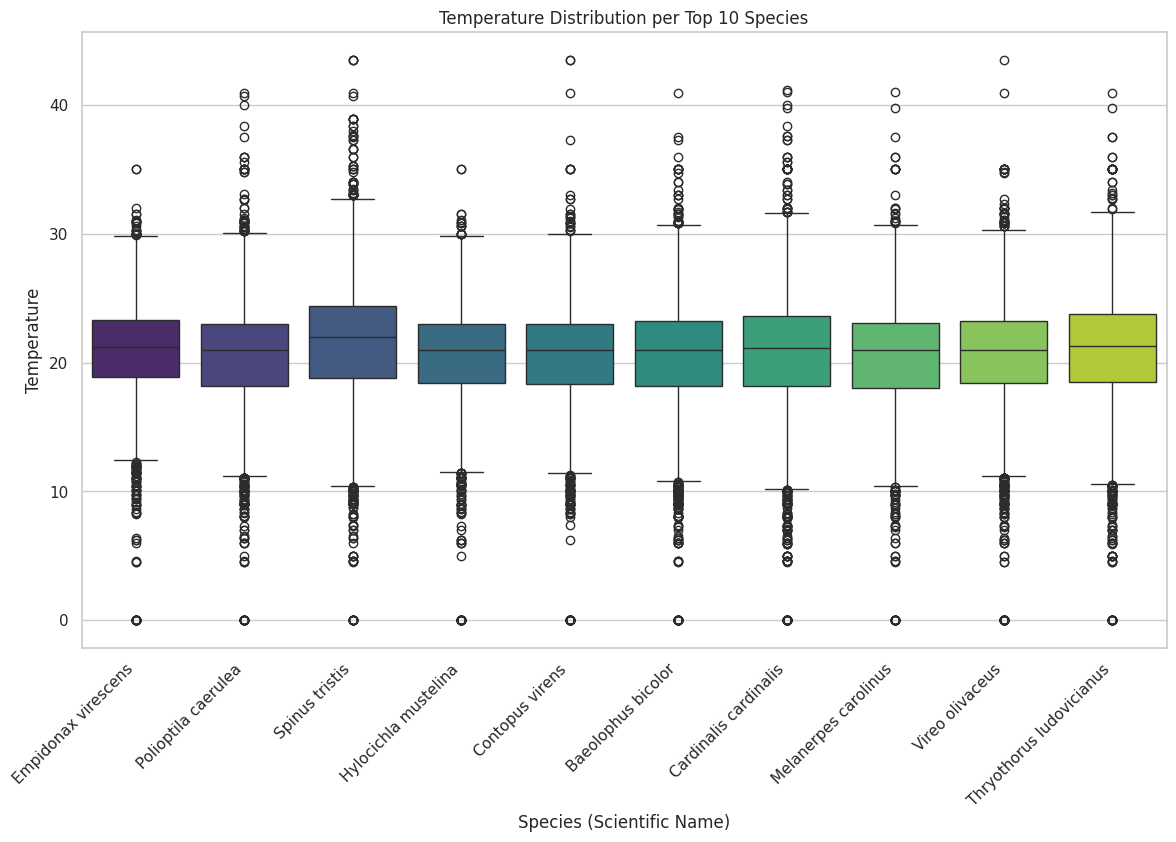

In [137]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Scientific_Name', y='Temperature', data=filtered_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Temperature Distribution per Top 10 Species')
plt.xlabel('Species (Scientific Name)')
plt.ylabel('Temperature')
plt.show()


<ipython-input-138-b35553e57f0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scientific_Name', y='Humidity', data=filtered_df, palette='viridis')


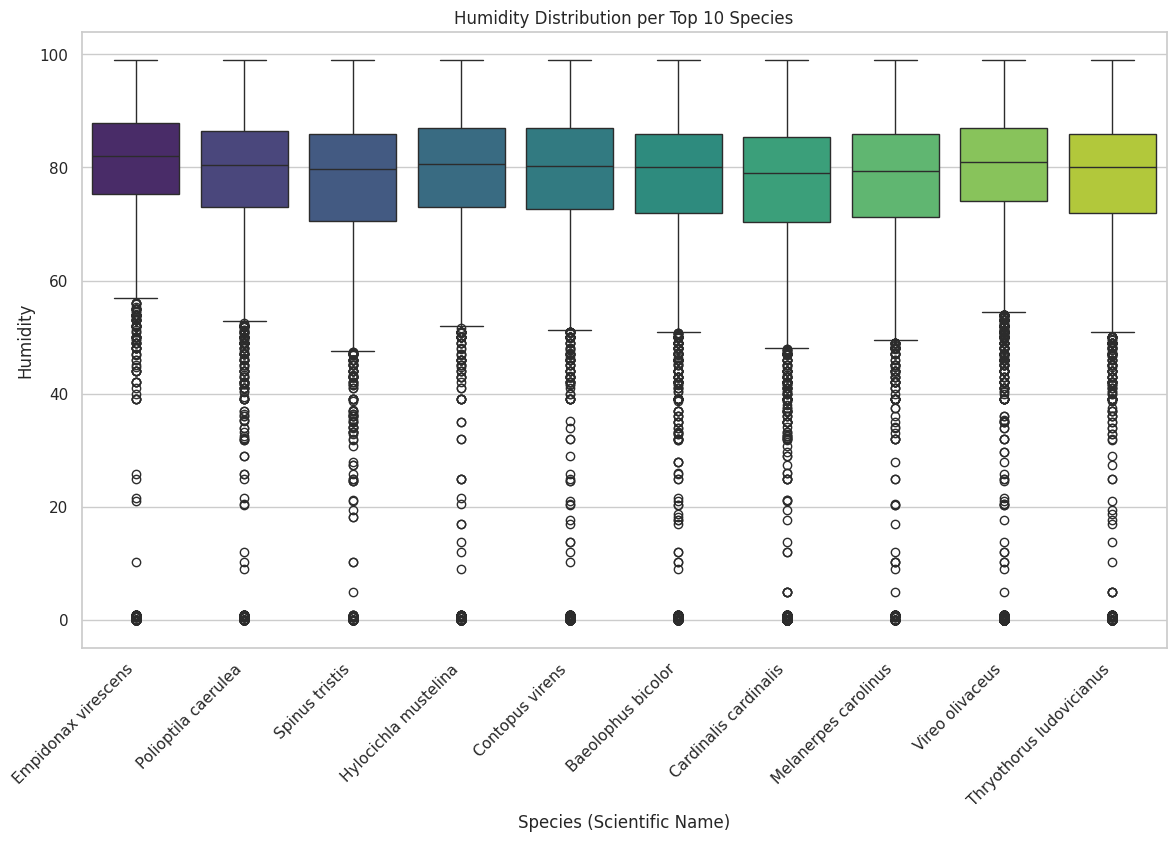

In [138]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Scientific_Name', y='Humidity', data=filtered_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Humidity Distribution per Top 10 Species')
plt.xlabel('Species (Scientific Name)')
plt.ylabel('Humidity')
plt.show()


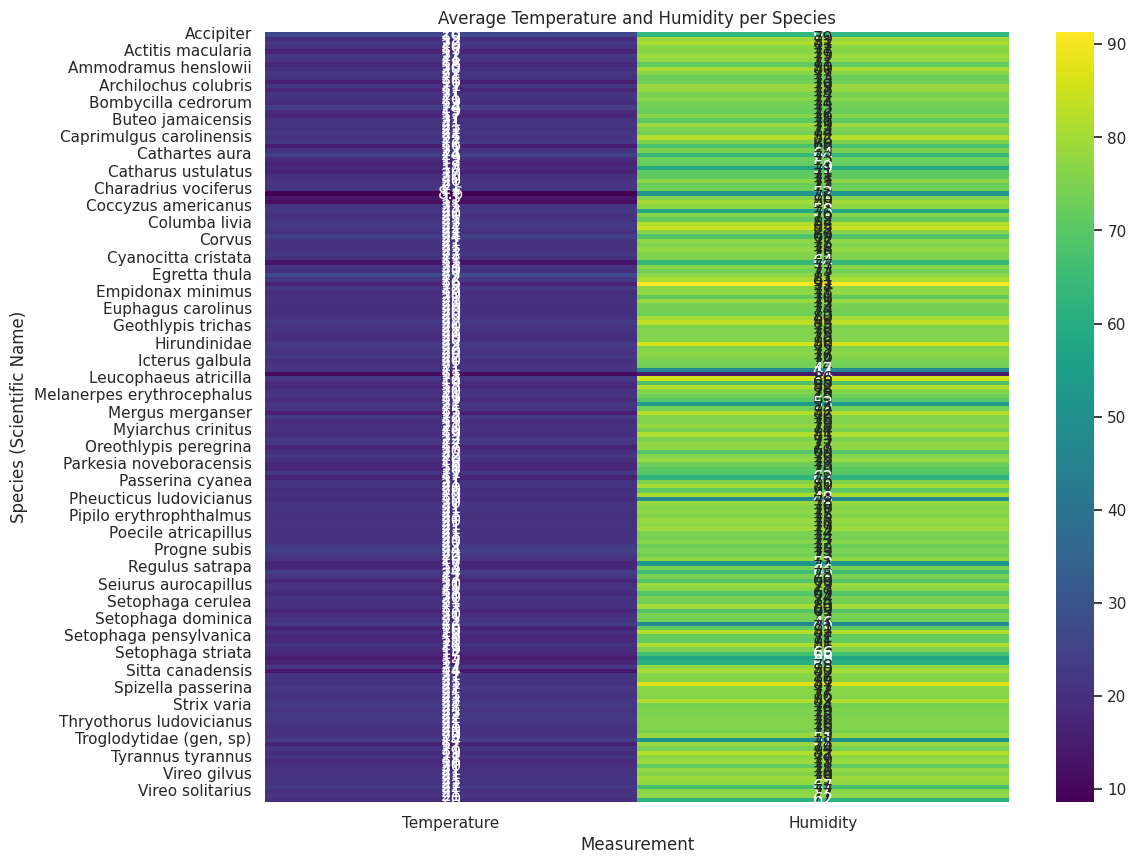

In [139]:
# Calculate average temperature and humidity per species
avg_temp_humidity = merged_df.groupby('Scientific_Name')[['Temperature', 'Humidity']].mean()

plt.figure(figsize=(12, 10))
sns.heatmap(avg_temp_humidity, annot=True, cmap='viridis')
plt.title('Average Temperature and Humidity per Species')
plt.xlabel('Measurement')
plt.ylabel('Species (Scientific Name)')
plt.show()


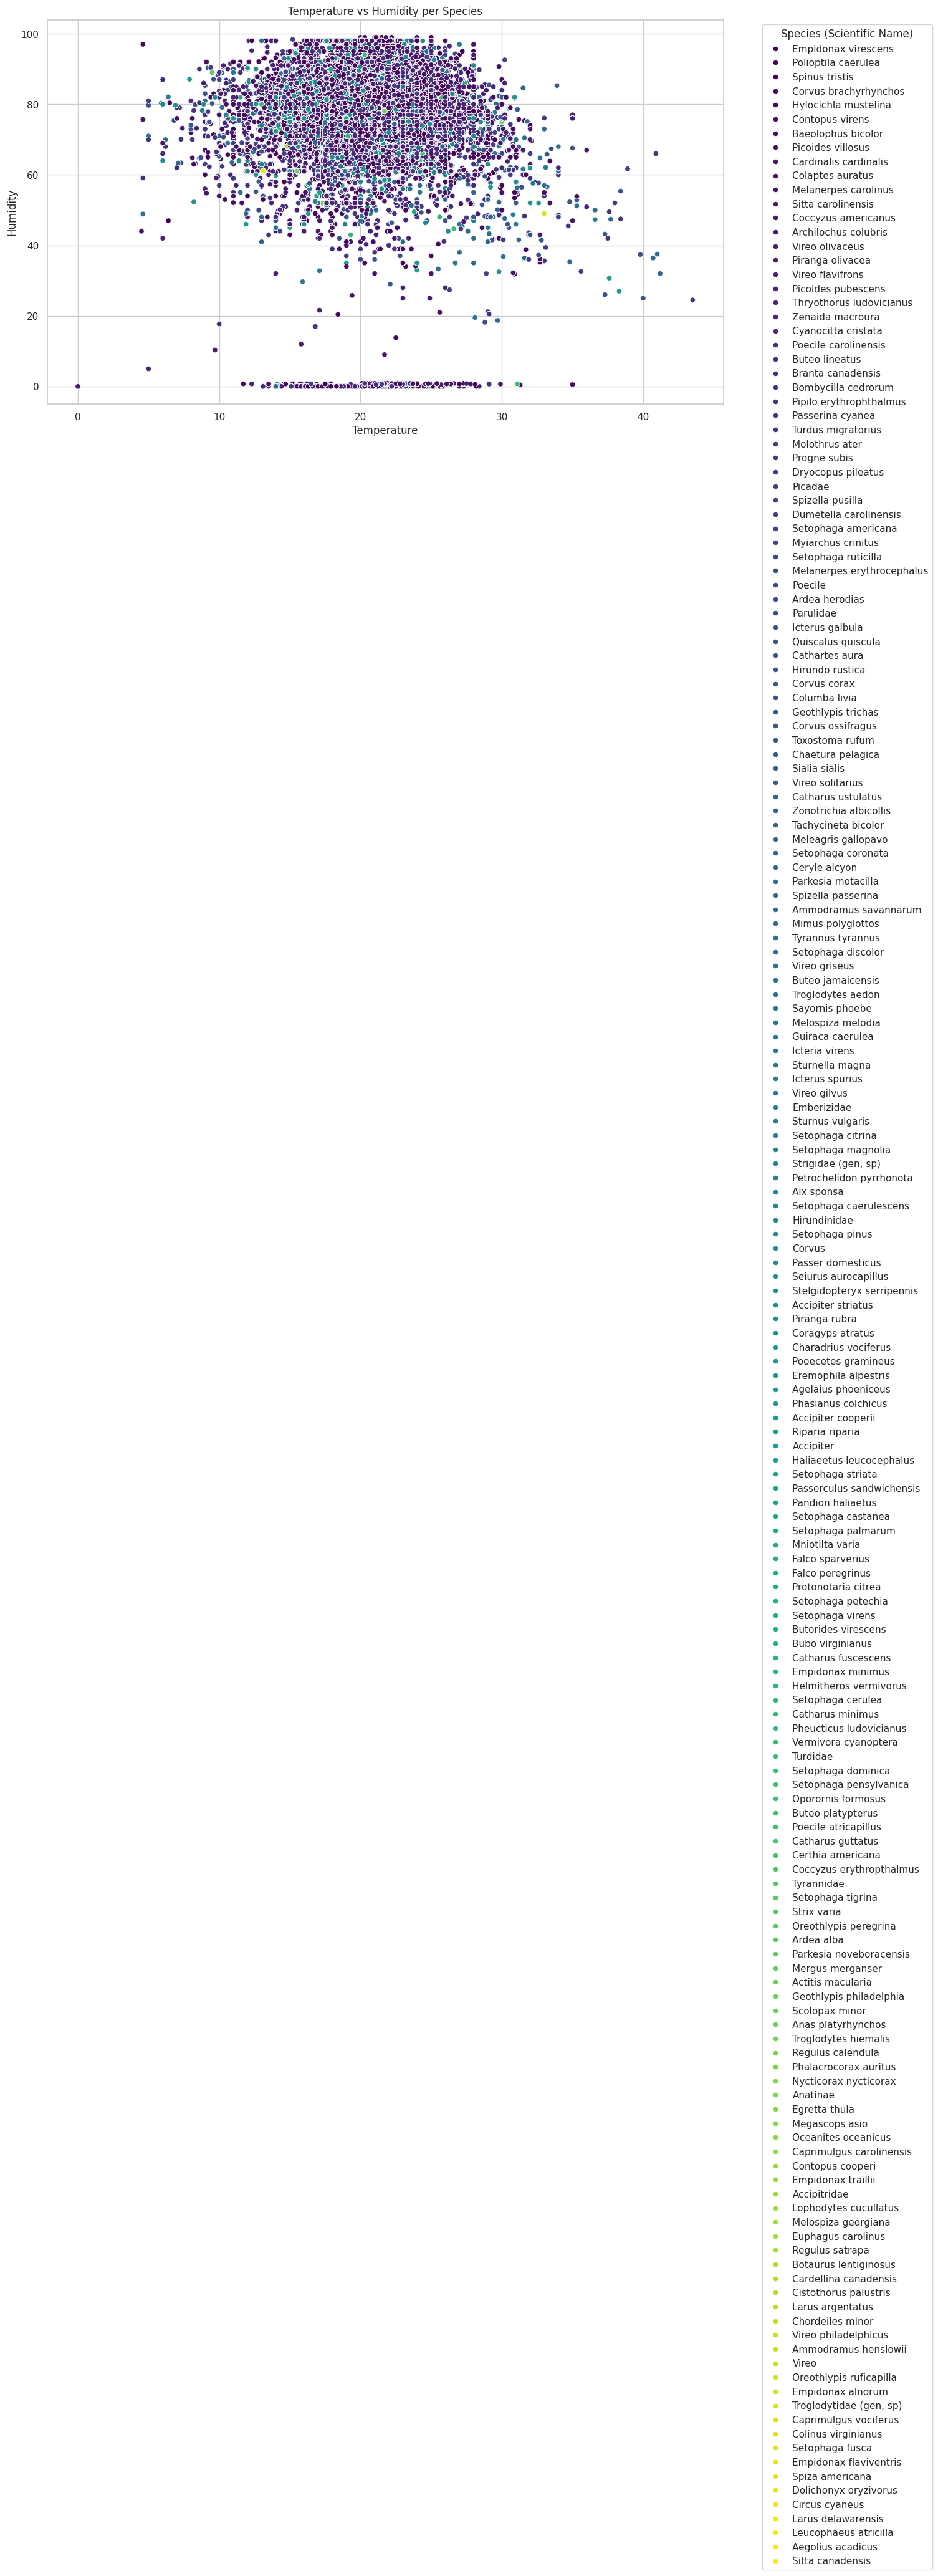

In [140]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Temperature', y='Humidity', hue='Scientific_Name', data=merged_df, palette='viridis')
plt.title('Temperature vs Humidity per Species')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Species (Scientific Name)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


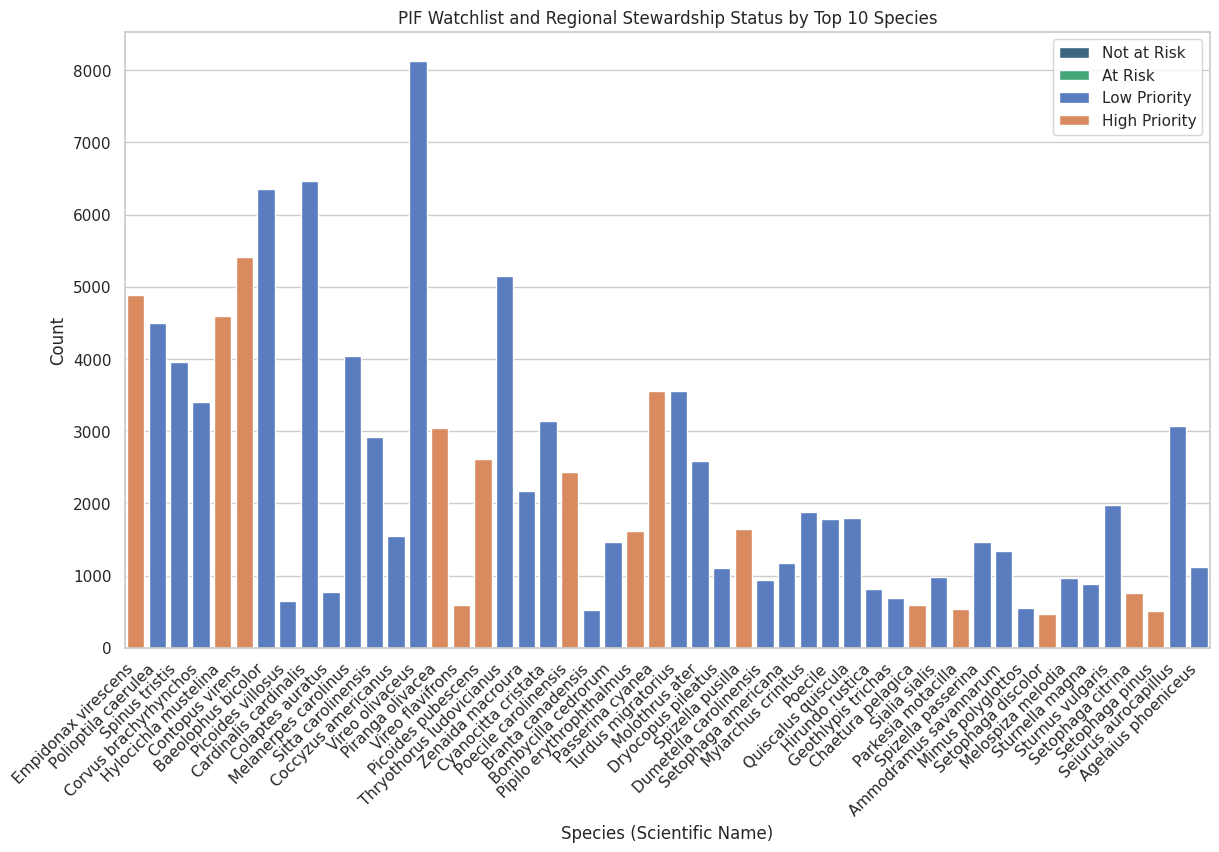

In [141]:
# Filter for top 10 species by count
top_10_species = merged_df['Scientific_Name'].value_counts().nlargest(50).index
filtered_df = merged_df[merged_df['Scientific_Name'].isin(top_10_species)]

plt.figure(figsize=(14, 8))
sns.countplot(x='Scientific_Name', hue='PIF_Watchlist_Status', data=filtered_df, palette='viridis', dodge=True)
sns.countplot(x='Scientific_Name', hue='Regional_Stewardship_Status', data=filtered_df, palette='muted', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title('PIF Watchlist and Regional Stewardship Status by Top 10 Species')
plt.xlabel('Species (Scientific Name)')
plt.ylabel('Count')
plt.legend(['Not at Risk', 'At Risk', 'Low Priority', 'High Priority'])
plt.show()


<Figure size 14000x3400 with 0 Axes>

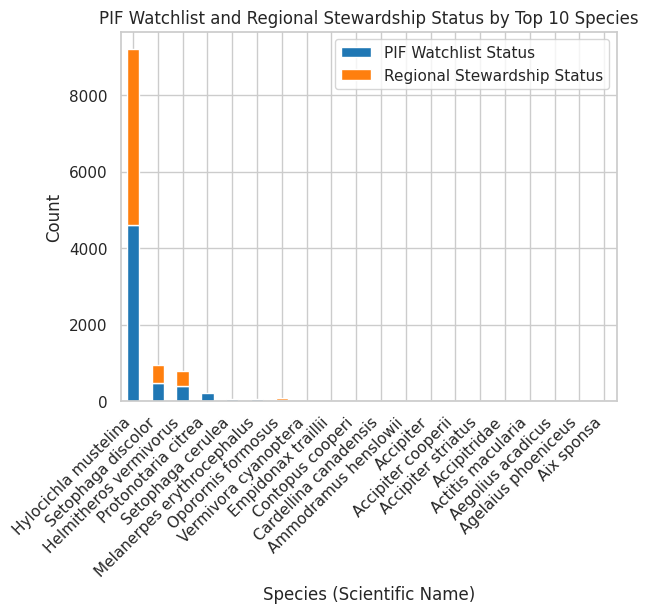

In [142]:
# Mapping PIF_Watchlist_Status and Regional_Stewardship_Status to numerical values
#merged_df['PIF_Watchlist_Status_Num'] = merged_df['PIF_Watchlist_Status'].map({False: 0, True: 1})
#merged_df['Regional_Stewardship_Status_Num'] = merged_df['Regional_Stewardship_Status'].map({False: 0, True: 1})

# Create a pivot table to aggregate counts
pivot_df = merged_df.pivot_table(index='Scientific_Name',
                                 values=['PIF_Watchlist_Status', 'Regional_Stewardship_Status'],
                                 aggfunc='sum').nlargest(20, 'PIF_Watchlist_Status')

# Plotting
plt.figure(figsize=(140, 34))
pivot_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.xticks(rotation=45, ha='right')
plt.title('PIF Watchlist and Regional Stewardship Status by Top 10 Species')
plt.xlabel('Species (Scientific Name)')
plt.ylabel('Count')
plt.legend(['PIF Watchlist Status', 'Regional Stewardship Status'])
plt.show()


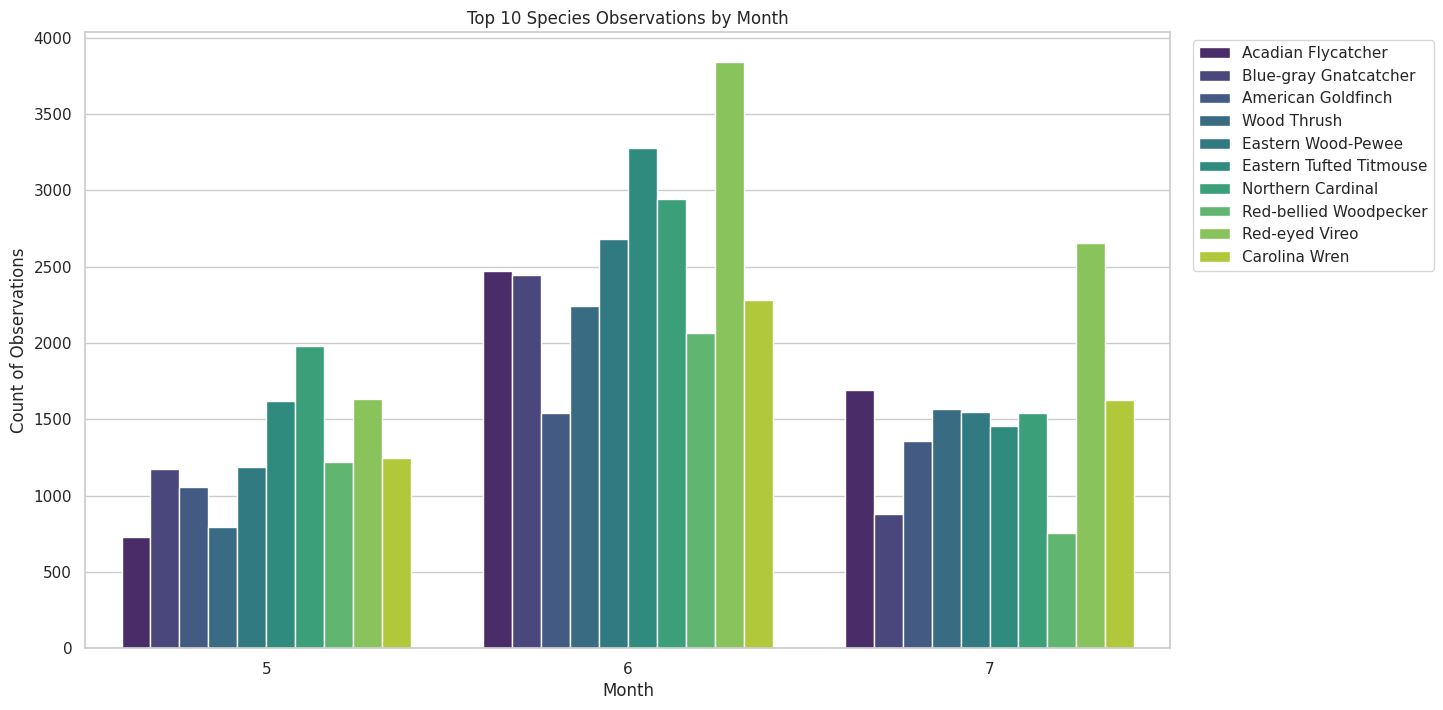

In [143]:
# Get the top 10 most observed species
top_species = merged_df['Common_Name'].value_counts().nlargest(10).index

# Filter the dataframe to include only these top species
filtered_df = merged_df[merged_df['Common_Name'].isin(top_species)]

# Set the plot size for better readability
plt.figure(figsize=(14, 8))

# Create a count plot to show the number of observations for each species per month
sns.countplot(x='Month', hue='Common_Name', data=filtered_df, palette='viridis')

# Add titles and labels for clarity
plt.title('Top 10 Species Observations by Month')
plt.xlabel('Month')
plt.ylabel('Count of Observations')

# Display the legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


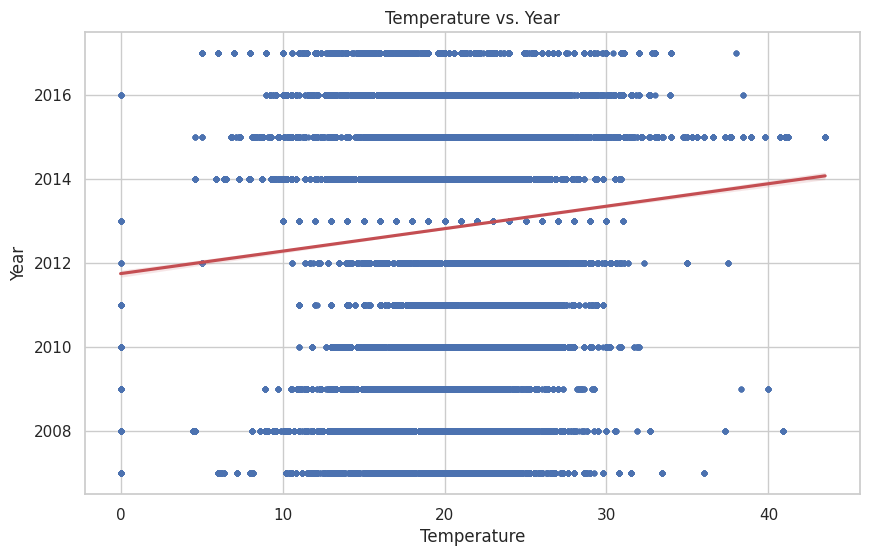

In [144]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Temperature', y='Year', data=merged_df, scatter_kws={'s':10}, line_kws={"color":"r"})
plt.title('Temperature vs. Year')
plt.xlabel('Temperature')
plt.ylabel('Year')
plt.show()


In [145]:
import pandas as pd

filtered_df = merged_df[(merged_df['Sex'] == 1) & (merged_df['Distance'] == '<= 50 Meters')]


result_df = filtered_df[['Common_Name', 'Sex', 'Distance']]
result_df.head(10)


Common_Name  Sex      Distance
3      American Goldfinch    1  <= 50 Meters
5             Wood Thrush    1  <= 50 Meters
19         Red-eyed Vireo    1  <= 50 Meters
26            Wood Thrush    1  <= 50 Meters
33  Yellow-throated Vireo    1  <= 50 Meters
34            Wood Thrush    1  <= 50 Meters
36      Northern Cardinal    1  <= 50 Meters
50         Red-eyed Vireo    1  <= 50 Meters
51      Northern Cardinal    1  <= 50 Meters
52     Carolina Chickadee    1  <= 50 Meters

In [146]:
import pandas as pd

filtered_df = merged_df[(merged_df['Temperature'] > 25) & (merged_df['Sky'] == 2)]

result_df = filtered_df[['Common_Name', 'Temperature', 'Sky']]
result_df.head(10)


Common_Name  Temperature  Sky
1108  Great Crested Flycatcher         25.9    2
1109             American Crow         25.9    2
1110         Northern Cardinal         25.9    2
1111     Red-headed Woodpecker         25.9    2
1112            Indigo Bunting         25.9    2
1113       Grasshopper Sparrow         25.9    2
1114            Eastern Towhee         25.9    2
1115             Cedar Waxwing         25.9    2
1116                  Blue Jay         25.9    2
1117      Brown-headed Cowbird         25.9    2

In [147]:
import pandas as pd

filtered_df = merged_df[(merged_df['Wind'] > 2) & (merged_df['Humidity'] < 50)]

result_df = filtered_df[['Common_Name', 'Wind', 'Humidity']]
result_df.head(10)


Common_Name  Wind   Humidity
1625           Red-eyed Vireo     3  48.900002
1626   Unidentified Chickadee     3  48.900002
1627   Red-bellied Woodpecker     3  48.900002
1628        Northern Cardinal     3  48.900002
1629        Northern Cardinal     3  48.900002
1630           Indigo Bunting     3  48.900002
1631            Cedar Waxwing     3  48.900002
1632       American Goldfinch     3  48.900002
1633  White-breasted Nuthatch     3  48.900002
3239            Field Sparrow     3  43.200001

In [148]:
import pandas as pd

filtered_df = merged_df[(merged_df['Disturbance'] == 0) & (merged_df['Year'] == 2010)]

result_df = filtered_df[['Common_Name', 'Disturbance', 'Year']]
result_df.head(10)


Common_Name  Disturbance  Year
72  Red-bellied Woodpecker            0  2010
73      American Goldfinch            0  2010
74   Blue-gray Gnatcatcher            0  2010
75                Blue Jay            0  2010
76            Canada Goose            0  2010
77           Cedar Waxwing            0  2010
78          Eastern Towhee            0  2010
79      Eastern Wood-Pewee            0  2010
80      Acadian Flycatcher            0  2010
81       Northern Cardinal            0  2010

In [149]:
import pandas as pd

filtered_df = merged_df[
    (merged_df['Temperature'] > 20) &
    (merged_df['Humidity'] < 70) &
    (merged_df['Sky'] == 1) &
    (merged_df['Wind'] < 3)
]

result_df = filtered_df[['Common_Name', 'Temperature', 'Humidity', 'Sky', 'Wind']]
result_df.head(10)


Common_Name  Temperature  Humidity  Sky  Wind
926             Mourning Dove         25.5      69.0    1     1
927            Eastern Towhee         25.5      69.0    1     1
928   Eastern Tufted Titmouse         25.5      69.0    1     1
929             Field Sparrow         25.5      69.0    1     1
930             Field Sparrow         25.5      69.0    1     1
931  Great Crested Flycatcher         25.5      69.0    1     1
932            Indigo Bunting         25.5      69.0    1     1
933      Brown-headed Cowbird         25.5      69.0    1     1
934             Mourning Dove         25.5      69.0    1     1
935         Northern Cardinal         25.5      69.0    1     1

In [150]:
import pandas as pd

filtered_df = merged_df[(merged_df['Regional_Stewardship_Status'] == 1) & (merged_df['Sky'] == 2)]

result_df = filtered_df[['Common_Name', 'Regional_Stewardship_Status', 'Sky']]
result_df.head(10)


Common_Name  Regional_Stewardship_Status  Sky
0      Acadian Flycatcher                            1    2
2      Acadian Flycatcher                            1    2
5             Wood Thrush                            1    2
6      Eastern Wood-Pewee                            1    2
12            Wood Thrush                            1    2
32     Eastern Wood-Pewee                            1    2
33  Yellow-throated Vireo                            1    2
34            Wood Thrush                            1    2
35        Scarlet Tanager                            1    2
37     Acadian Flycatcher                            1    2

In [151]:
import pandas as pd



 #mapping Park Names to Coordinates
park_coordinates = {
    'Prince William Forest Park': (38.5676, -77.3716),
    'Chesapeake and Ohio Canal National Historical Park': (38.9098, -77.0409),
    'Antietam National Battlefield': (39.4670, -77.7486),
    'Manassas National Battlefield Park': (38.8140, -77.5217),
    'Monocacy National Battlefield': (39.3825, -77.4037),
    'Catoctin Mountain Park': (39.6430, -77.4561),
    'National Capital Parks-East': (38.8876, -76.9801),
    'Harpers Ferry National Historical Park': (39.3230, -77.7390),
    'George Washington Memorial Parkway': (38.9292, -77.0977),
    'Rock Creek Park': (38.9606, -77.0369),
    'Wolf Trap National Park for the Performing Arts': (38.9396, -77.2642)
}

# Function to map Park_Name to coordinates
def get_coordinates(park_name):
    return park_coordinates.get(park_name, (None, None))

# Apply the function to the Park_Name column to create new Latitude and Longitude columns
merged_df['Latitude'], merged_df['Longitude'] = zip(*merged_df['Park_Name'].map(get_coordinates))




I have generated the cordinates from google and mapped them with park names .

In [152]:
#lets check the dataframe with coordinates point
merged_df.head(2)


Admin_Unit_Code  Plot_Name Location_Type         Observer  Visit  \
0            ANTI  ANTI-0207        Forest  Desiree Narango      1   
1            ANTI  ANTI-0207        Forest  Desiree Narango      1   

  Interval_Length ID_Method         Distance  Flyover_Observed  Sex  ...  \
0       0-2.5 min   Calling     <= 50 Meters                 0    2  ...   
1       0-2.5 min   Calling  50 - 100 Meters                 0    2  ...   

  Disturbance Initial_Three_Min_Cnt                      Park_Name  Year  \
0           0                     1  Antietam National Battlefield  2008   
1           0                     1  Antietam National Battlefield  2008   

  Month  Day  Observation_Time  Observation_Date  Latitude  Longitude  
0     5   28        2008-05-28        2008-05-28    39.467   -77.7486  
1     5   28        2008-05-28        2008-05-28    39.467   -77.7486  

[2 rows x 31 columns]

In [153]:
pip install contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.2 MB/s eta 0:00:00


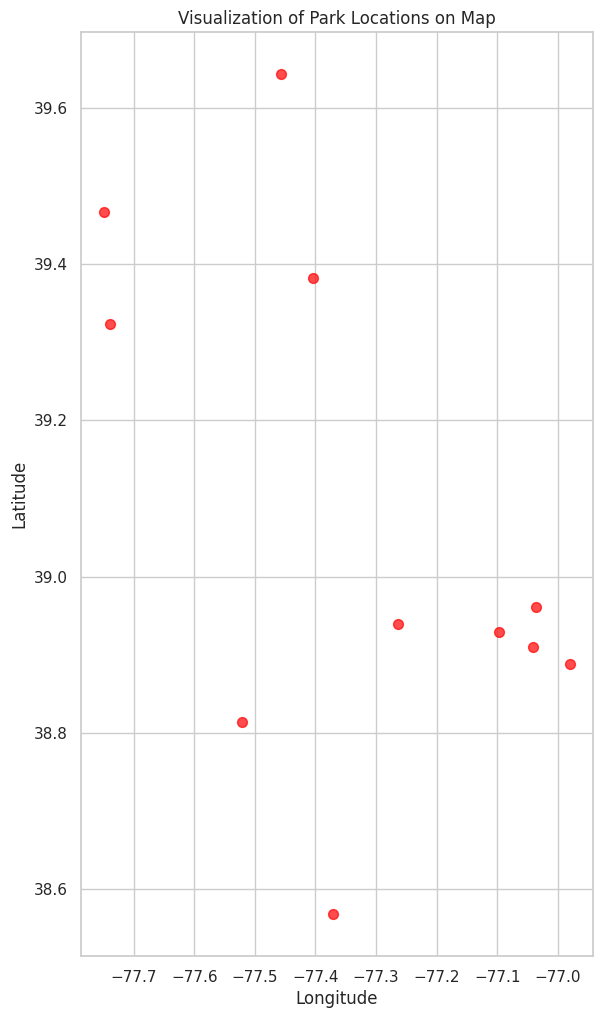

In [154]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Data with coordinates
data = {
    'park_name': [
        'PRWI', 'CHOH', 'ANTI', 'MANA', 'MONO',
        'CATO', 'NACE', 'HAFE', 'GWMP', 'ROCR', 'WOTR'
    ],
    'Latitude': [
        38.5676, 38.9098, 39.4670, 38.8140, 39.3825,
        39.6430, 38.8876, 39.3230, 38.9292, 38.9606, 38.9396
    ],
    'Longitude': [
        -77.3716, -77.0409, -77.7486, -77.5217, -77.4037,
        -77.4561, -76.9801, -77.7390, -77.0977, -77.0369, -77.2642
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set CRS (Coordinate Reference System) to WGS84
geo_df.set_crs(epsg=4326, inplace=True)

# Plot the GeoDataFrame with a basemap
fig, ax = plt.subplots(figsize=(12, 12))
geo_df.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.7)



# Add title and labels
plt.title('Visualization of Park Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [155]:
pip install folium

In [156]:
import folium
import pandas as pd

# Data with coordinates
data = {
    'park_name': [
        'PRWI', 'CHOH', 'ANTI', 'MANA', 'MONO',
        'CATO', 'NACE', 'HAFE', 'GWMP', 'ROCR', 'WOTR'
    ],
    'full_name': [
        'Prince William Forest Park', 'Chesapeake and Ohio Canal National Historical Park',
        'Antietam National Battlefield', 'Manassas National Battlefield Park',
        'Monocacy National Battlefield', 'Catoctin Mountain Park',
        'National Capital Parks-East', 'Harpers Ferry National Historical Park',
        'George Washington Memorial Parkway', 'Rock Creek Park',
        'Wolf Trap National Park for the Performing Arts'
    ],
    'Latitude': [
        38.5676, 38.9098, 39.4670, 38.8140, 39.3825,
        39.6430, 38.8876, 39.3230, 38.9292, 38.9606, 38.9396
    ],
    'Longitude': [
        -77.3716, -77.0409, -77.7486, -77.5217, -77.4037,
        -77.4561, -76.9801, -77.7390, -77.0977, -77.0369, -77.2642
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Initialize a folium map centered around the average coordinates
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add points to the map
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>{row['full_name']}</b><br>({row['park_name']})",
        tooltip=row['park_name']
    ).add_to(m)

# Save map to an HTML file
m.save("parks_map.html")


m


Data Preparation:

I have created a dictionary with park names, full names, and their corresponding coordinates.Now,Convert this dictionary into a pandas DataFrame.

Initialize Map:

Initialize a folium.Map object centered around the average latitude and longitude of all parks.
Click on marker to check abbrevation of the park


**PREPARING MODEL**

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numerical
label_encoder = LabelEncoder()
merged_df['Scientific_Name'] = label_encoder.fit_transform(merged_df['Scientific_Name'])
merged_df['Plot_Name'] = label_encoder.fit_transform(merged_df['Plot_Name'])
# Define target variable and features
X = merged_df[['Scientific_Name','Plot_Name','Temperature', 'Humidity', 'Sky','Wind','Disturbance','Year','Month', 'Day','Sex','Latitude','Longitude']]
y = merged_df['PIF_Watchlist_Status']  # Example target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9973327699580109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36090
           1       1.00      0.94      0.97      1777

    accuracy                           1.00     37867
   macro avg       1.00      0.97      0.98     37867
weighted avg       1.00      1.00      1.00     37867



In [158]:
merged_df.head(2)

Admin_Unit_Code  Plot_Name Location_Type         Observer  Visit  \
0            ANTI        113        Forest  Desiree Narango      1   
1            ANTI        113        Forest  Desiree Narango      1   

  Interval_Length ID_Method         Distance  Flyover_Observed  Sex  ...  \
0       0-2.5 min   Calling     <= 50 Meters                 0    2  ...   
1       0-2.5 min   Calling  50 - 100 Meters                 0    2  ...   

  Disturbance  Initial_Three_Min_Cnt                      Park_Name  Year  \
0           0                      1  Antietam National Battlefield  2008   
1           0                      1  Antietam National Battlefield  2008   

  Month  Day  Observation_Time  Observation_Date  Latitude  Longitude  
0     5   28        2008-05-28        2008-05-28    39.467   -77.7486  
1     5   28        2008-05-28        2008-05-28    39.467   -77.7486  

[2 rows x 31 columns]

Fitting 5 folds for each of 162 candidates, totalling 810 fits


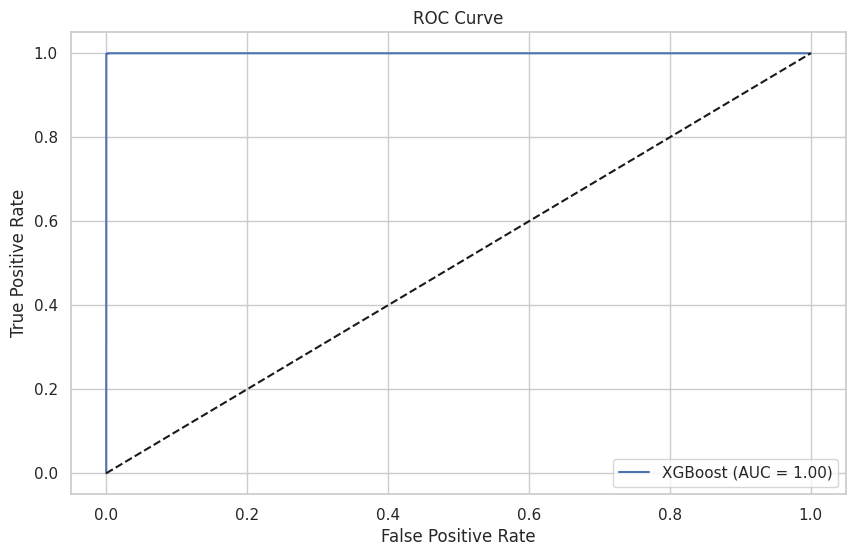

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Data Preparation
# Ensure all necessary preprocessing steps are applied

# Convert categorical features to numerical

label_encoder = LabelEncoder()
merged_df['Scientific_Name'] = label_encoder.fit_transform(merged_df['Scientific_Name'])
merged_df['Plot_Name'] = label_encoder.fit_transform(merged_df['Plot_Name'])
# Define features and target
features =['Scientific_Name','Plot_Name','Temperature', 'Humidity', 'Sky','Wind','Disturbance','Year','Month', 'Day','Sex','Latitude','Longitude']
target = 'PIF_Watchlist_Status'

# Split the data into train and test sets
X = merged_df[features]
y = merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("Best hyperparameters:", grid_search.best_params_)


The AUC score is 1, indicating perfect classification, meaning the model perfectly distinguishes between the positive and negative classes without any errors.Infact, randomforest classifier model also has a accuracy of 0.997 approx.

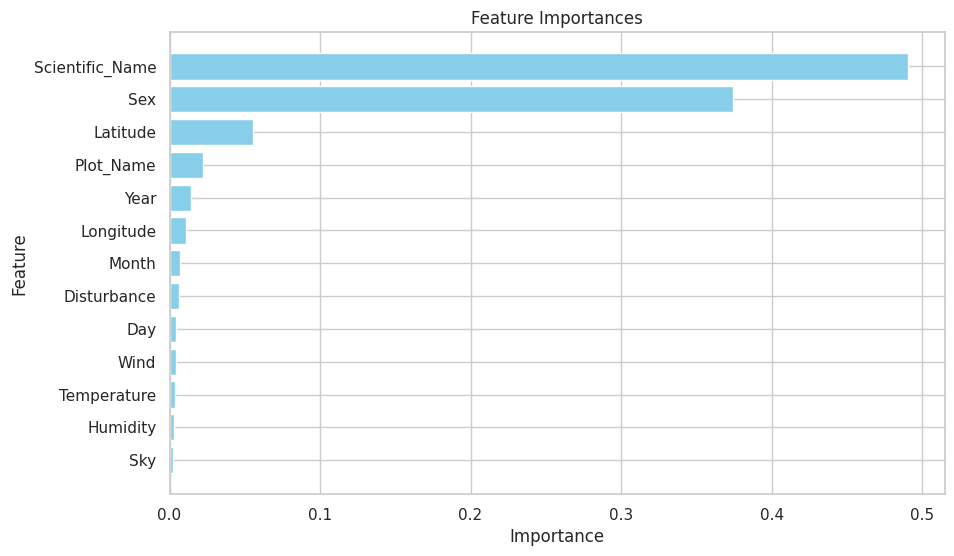

In [160]:
import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = best_model.feature_importances_
features = ['Scientific_Name','Plot_Name','Temperature', 'Humidity', 'Sky','Wind','Disturbance','Year','Month', 'Day','Sex','Latitude','Longitude']

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


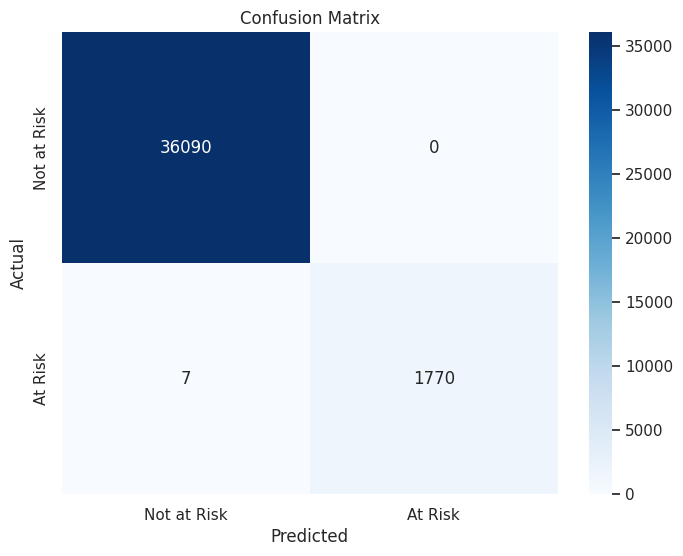

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict class labels
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not at Risk', 'At Risk'], yticklabels=['Not at Risk', 'At Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


True Negatives (TN) (36090): The number of instances correctly predicted as "Not at Risk".

False Positives (FP) (0): The number of instances incorrectly predicted as "At Risk" when they are actually "Not at Risk".

False Negatives (FN) (7): The number of instances incorrectly predicted as "Not at Risk" when they are actually "At Risk".

True Positives (TP) (1770): The number of instances correctly predicted as "At Risk".

Interpretation:

High Accuracy: The model has very high accuracy, correctly predicting the majority of instances.

High Precision and Recall: The precision is perfect (1.0), meaning every instance predicted as "At Risk" is actually "At Risk". The recall is also very high, meaning the model successfully identifies most "At Risk" instances.

Low False Negatives: There are very few false negatives (7), indicating that the model rarely misses instances that are actually "At Risk".

Overall, the model performs exceptionally well, especially in identifying the "At Risk" class with minimal errors. The high precision and recall values suggest the model is both accurate and reliable for the given classification task.


In [162]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126223 entries, 0 to 126572
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Admin_Unit_Code              126223 non-null  object        
 1   Plot_Name                    126223 non-null  int64         
 2   Location_Type                126223 non-null  object        
 3   Observer                     126223 non-null  object        
 4   Visit                        126223 non-null  int64         
 5   Interval_Length              126223 non-null  object        
 6   ID_Method                    126223 non-null  object        
 7   Distance                     126223 non-null  object        
 8   Flyover_Observed             126223 non-null  int64         
 9   Sex                          126223 non-null  int64         
 10  Common_Name                  126223 non-null  object        
 11  Scientific_Name              12

In [163]:
with pd.ExcelWriter('merged_dataset.xlsx', engine='xlsxwriter') as writer:
    merged_df.to_excel(writer, index=False)